In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_mood_smartphone.csv')


In [3]:
df.head()

Unnamed: 0       id                     time variable  value
0           1  AS14.01  2014-02-26 13:00:00.000     mood    6.0
1           2  AS14.01  2014-02-26 15:00:00.000     mood    6.0
2           3  AS14.01  2014-02-26 18:00:00.000     mood    6.0
3           4  AS14.01  2014-02-26 21:00:00.000     mood    7.0
4           5  AS14.01  2014-02-27 09:00:00.000     mood    6.0

In [4]:
df.dtypes

Unnamed: 0      int64
id             object
time           object
variable       object
value         float64
dtype: object

The datatypes

In [5]:
# calculating sum
df.isna().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

- 202 missing values in the column "values"

In [6]:
# transorming the dtype of "time"
df=df.dropna()
df["time"] = pd.to_datetime(df["time"])
df = df.drop('Unnamed: 0', axis=1)

In [7]:
# transformatiing the variable name

# removed appcat string from variable name
# AS14.01 -> 01
df.loc[df['variable'].str.startswith('appCat.'), 'variable'] = df.loc[df['variable'].str.startswith('appCat.'), 'variable'].str.replace('appCat.', '')
df.loc[df['variable'].str.startswith('circumplex.'), 'variable'] = df.loc[df['variable'].str.startswith('circumplex.'), 'variable'].str.replace('circumplex.', '')
df.loc[df['id'].str.startswith('AS14.'), 'id'] = df.loc[df['id'].str.startswith('AS14.'), 'id'].str.replace('AS14.', '')

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_43323/2364289440.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['variable'].str.startswith('appCat.'), 'variable'] = df.loc[df['variable'].str.startswith('appCat.'), 'variable'].str.replace('appCat.', '')
/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_43323/2364289440.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['variable'].str.startswith('circumplex.'), 'variable'] = df.loc[df['variable'].str.startswith('circumplex.'), 'variable'].str.replace('circumplex.', '')
/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_43323/2364289440.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['id'].str.startswith('AS14.'), 'id'] = df.loc[df['id'].str.startswith('AS14.'), 'id'].str.replace('AS14.', '')


In [8]:
df.describe(include="all")


/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_43323/1519091745.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


id                        time variable          value
count   376710                      376710   376710  376710.000000
unique      27                      336907       19            NaN
top         01         2014-04-17 18:00:00   screen            NaN
freq     21982                          90    96578            NaN
first      NaN  2014-02-17 07:00:52.197000      NaN            NaN
last       NaN         2014-06-09 00:00:00      NaN            NaN
mean       NaN                         NaN      NaN      40.665313
std        NaN                         NaN      NaN     273.726007
min        NaN                         NaN      NaN  -82798.871000
25%        NaN                         NaN      NaN       2.025000
50%        NaN                         NaN      NaN       7.029000
75%        NaN                         NaN      NaN      29.356000
max        NaN                         NaN      NaN   33960.246000

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_43323/16994401.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_43323/16994401.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


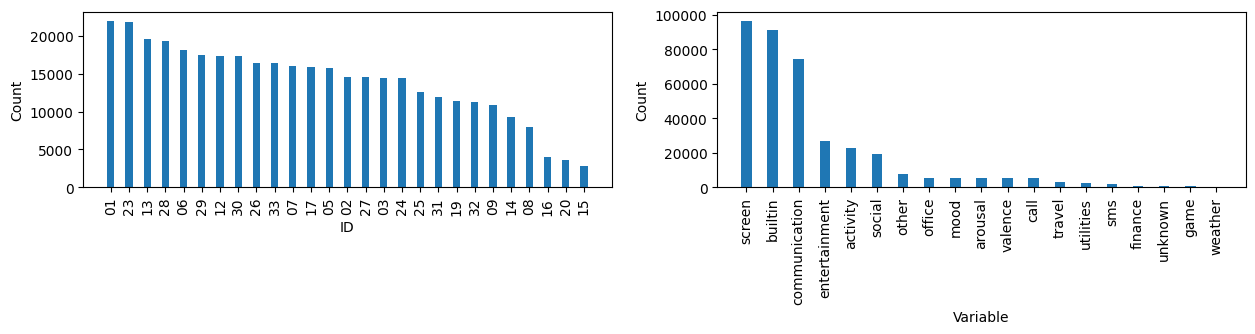

In [9]:
fig,ax = plt.subplots(1,2,figsize=[15,5])


x = df['id'].value_counts()
cols = [i for i in x.axes[0]]
vals = [i for i in x]
plt.subplot(2,2,1)
plt.bar(cols, vals, width = 0.4) 
plt.xlabel("ID")
plt.ylabel("Count")
plt.xticks(rotation=90)

x = df['variable'].value_counts()
cols = [i for i in x.axes[0]]
vals = [i for i in x]
plt.subplot(2,2,2)
plt.bar(cols, vals, width = 0.4)
plt.xlabel("Variable")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()


- It can be seen that the amount of data collected for various id's is different.
- Similarly, the observed data per variable is non homgenously distributed

# Plotting Graphs

In [10]:
# import warnings
# warnings.filterwarnings('ignore')

# x = df['id'].value_counts()
# cols = [i for i in x.axes[0]]
# count = 1
# for i in cols:
#     # plt.subplot(14,2,count)
#     # count += 1

#     grouped = df.groupby('id')
#     col = grouped.get_group(i)

#     x = col['variable'].value_counts()
#     x = [i for i in x.axes[0]]
#     y = list(col['variable'].value_counts())
#     z=x
#     data_list = pd.DataFrame(
#         {'x_axis': x,
#         'y_axis': y,
#         'category': z
#         })

#     minsize = min(data_list['y_axis'])
#     maxsize = max(data_list['y_axis'])

#     sns.catplot(x="x_axis", y="y_axis", kind="swarm", hue="category",sizes=(100,100), data=data_list)
#     sns.set_style('darkgrid')
#     plt.xticks(rotation=90)
#     plt.xlabel('Variables')
#     plt.ylabel('Count')
#     plt.title(f'Count of variables per id for participant {i}')
# # plt.show()

In [11]:
# for variable in df['variable'].unique():
#     temp_df = df[df['variable'] == variable]
#     group = temp_df.groupby('id')['value'].mean().reset_index()
#     # plot the grouped data
#     sns.set(rc={'figure.figsize':(10,5)})
#     sns.scatterplot(x=group['id'], y = group['value'])
#     plt.xlabel('id')
#     plt.ylabel('mean value')
#     plt.title(f'Mean value of {variable} column for each id')
#     plt.figure(figsize=(200, 5))
#     plt.show()

# Transforming the data

In [12]:
df['time'][:10]

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_43323/3470066433.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['time'][:10]


0   2014-02-26 13:00:00
1   2014-02-26 15:00:00
2   2014-02-26 18:00:00
3   2014-02-26 21:00:00
4   2014-02-27 09:00:00
5   2014-02-27 12:00:00
6   2014-02-27 15:00:00
7   2014-03-21 09:00:00
8   2014-03-21 11:00:00
9   2014-03-21 15:00:00
Name: time, dtype: datetime64[ns]

In [13]:
df['date'] = df['time'].dt.date



In [14]:
df['date'][:5]

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_43323/1752055502.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['date'][:5]


0    2014-02-26
1    2014-02-26
2    2014-02-26
3    2014-02-26
4    2014-02-27
Name: date, dtype: object

In [15]:
import numpy as np
new_df_mean = pd.pivot_table(df, values='value', index=['id', 'date'], columns=['variable'], 
                        aggfunc='mean').reset_index()
new_df_sum = pd.pivot_table(df, values='value', index=['id', 'date'], columns=['variable'], 
                        aggfunc='sum').reset_index()

print(new_df_mean.head(5))
print(new_df_sum.head(5))

variable  id        date  activity  arousal  builtin  call  communication  \
0         01  2014-02-17       NaN      NaN      NaN   1.0            NaN   
1         01  2014-02-18       NaN      NaN      NaN   1.0            NaN   
2         01  2014-02-19       NaN      NaN      NaN   1.0            NaN   
3         01  2014-02-20       NaN      NaN      NaN   1.0            NaN   
4         01  2014-02-21       NaN      NaN      NaN   NaN            NaN   

variable  entertainment  finance  game  ...  office  other  screen  sms  \
0                   NaN      NaN   NaN  ...     NaN    NaN     NaN  NaN   
1                   NaN      NaN   NaN  ...     NaN    NaN     NaN  NaN   
2                   NaN      NaN   NaN  ...     NaN    NaN     NaN  1.0   
3                   NaN      NaN   NaN  ...     NaN    NaN     NaN  1.0   
4                   NaN      NaN   NaN  ...     NaN    NaN     NaN  1.0   

variable  social  travel  unknown  utilities  valence  weather  
0            NaN     

In [16]:
df['variable'].unique()

array(['mood', 'arousal', 'valence', 'activity', 'screen', 'call', 'sms',
       'builtin', 'communication', 'entertainment', 'finance', 'game',
       'office', 'other', 'social', 'travel', 'unknown', 'utilities',
       'weather'], dtype=object)

In [17]:
# Picking mood, valence, arousal and activity from new_df_mean while other from new_df_sum
transformed_df = pd.concat([new_df_mean[['id', 'date','mood', 'arousal', 'valence', 'activity']], new_df_sum[['screen', 'call', 'sms',
       'builtin', 'communication', 'entertainment', 'finance', 'game',
       'office', 'other', 'social', 'travel', 'unknown', 'utilities',
       'weather']]], axis=1).reset_index(drop=True)

transformed_df.head(5)

variable  id        date  mood  arousal  valence  activity  screen  call  sms  \
0         01  2014-02-17   NaN      NaN      NaN       NaN     NaN   2.0  NaN   
1         01  2014-02-18   NaN      NaN      NaN       NaN     NaN   1.0  NaN   
2         01  2014-02-19   NaN      NaN      NaN       NaN     NaN   7.0  2.0   
3         01  2014-02-20   NaN      NaN      NaN       NaN     NaN   2.0  3.0   
4         01  2014-02-21   NaN      NaN      NaN       NaN     NaN   NaN  1.0   

variable  builtin  ...  entertainment  finance  game  office  other  social  \
0             NaN  ...            NaN      NaN   NaN     NaN    NaN     NaN   
1             NaN  ...            NaN      NaN   NaN     NaN    NaN     NaN   
2             NaN  ...            NaN      NaN   NaN     NaN    NaN     NaN   
3             NaN  ...            NaN      NaN   NaN     NaN    NaN     NaN   
4             NaN  ...            NaN      NaN   NaN     NaN    NaN     NaN   

variable  travel  unknown  utilities  weather  
0            NaN      NaN        NaN      NaN  
1            NaN      NaN        NaN      NaN  
2            NaN      NaN        NaN      NaN  
3            NaN      NaN        NaN      NaN  
4            NaN      NaN        NaN      NaN  

[5 rows x 21 columns]

In [18]:
transformed_df['date'] = pd.to_datetime(transformed_df['date'])
print(transformed_df.dtypes)
transformed_df['date'][:10]

variable
id                       object
date             datetime64[ns]
mood                    float64
arousal                 float64
valence                 float64
activity                float64
screen                  float64
call                    float64
sms                     float64
builtin                 float64
communication           float64
entertainment           float64
finance                 float64
game                    float64
office                  float64
other                   float64
social                  float64
travel                  float64
unknown                 float64
utilities               float64
weather                 float64
dtype: object


0   2014-02-17
1   2014-02-18
2   2014-02-19
3   2014-02-20
4   2014-02-21
5   2014-02-22
6   2014-02-25
7   2014-02-26
8   2014-02-27
9   2014-02-28
Name: date, dtype: datetime64[ns]

In [19]:
transformed_df.describe().T

count         mean          std        min          25%  \
variable                                                                  
mood           1268.0     6.990063     0.736465      3.000     6.600000   
arousal        1268.0    -0.103851     0.662715     -2.000    -0.600000   
valence        1266.0     0.687112     0.434602     -1.250     0.400000   
activity       1188.0     0.120003     0.098301      0.000     0.054872   
screen         1207.0  6027.939920  4696.746814      0.462  2423.275500   
call           1338.0     3.915546     3.555254      1.000     1.000000   
sms             734.0     2.449591     2.327730      1.000     1.000000   
builtin        1195.0  1416.168076  3841.698865 -80367.930   262.656000   
communication  1183.0  2721.389269  2466.290266      1.095   867.679500   
entertainment   850.0  1199.131796  1921.094754      1.014   200.786500   
finance         207.0    98.686865   155.448526      1.004    27.139000   
game            193.0   540.841363  1171.180079      1.010    82.664000   
office          276.0   461.558359  2128.298133      0.044    17.101750   
other          1120.0   176.297251   395.155057      2.007    44.507750   
social          988.0  1402.970122  1982.361939      0.725   208.440250   
travel          429.0   303.379951   720.460894      0.080    62.299000   
unknown         264.0   162.023761   317.440513      0.111    22.132250   
utilities       433.0   106.473192   234.074451      1.002     9.033000   
weather         113.0    45.468336    53.280275      1.007    13.111000   

                       50%          75%           max  
variable                                               
mood              7.000000     7.500000      9.333333  
arousal           0.000000     0.400000      2.000000  
valence           0.800000     1.000000      2.000000  
activity          0.095634     0.149358      0.566171  
screen         5026.947999  8558.515500  36204.105001  
call              3.000000     5.000000     31.000000  
sms               1.000000     3.000000     17.000000  
builtin         764.085000  1558.217000  40323.877000  
communication  2078.403000  3789.369000  20718.749000  
entertainment   662.026000  1551.364500  35937.645000  
finance          49.379000    99.850000   1321.104000  
game            209.750000   540.616000  12996.495000  
office           71.999000   271.162750  33283.021000  
other            65.393000   139.492750   4335.307000  
social          759.500000  2001.708500  30073.421000  
travel          143.316000   284.954000  10548.116000  
unknown          66.667000   176.652250   2821.547000  
utilities        26.402000    88.629000   2257.626000  
weather          30.386000    54.055000    366.937000

In [20]:
# df_grouped = df.groupby([df['id'], df['variable'], df['time'].dt.date])


# # Apply mean aggregation to "value" column for each group
# df_mean = df_grouped.agg({'value': 'mean'})

# # Reset index to make the groupby columns as regular columns
# df_mean = df_mean.reset_index()

# # Pivot the data
# df_mean['time'] = pd.to_datetime(df_mean['time'])
# new_df = df_mean.pivot(index=['id', 'time'], columns='variable', values='value')
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# # Display the entire dataframe
# #new_df.to_excel('output_file.xlsx', index=True)
# new_df
# #new_df.isnull().sum()


## level 0 visualization

In [21]:
import missingno as msno

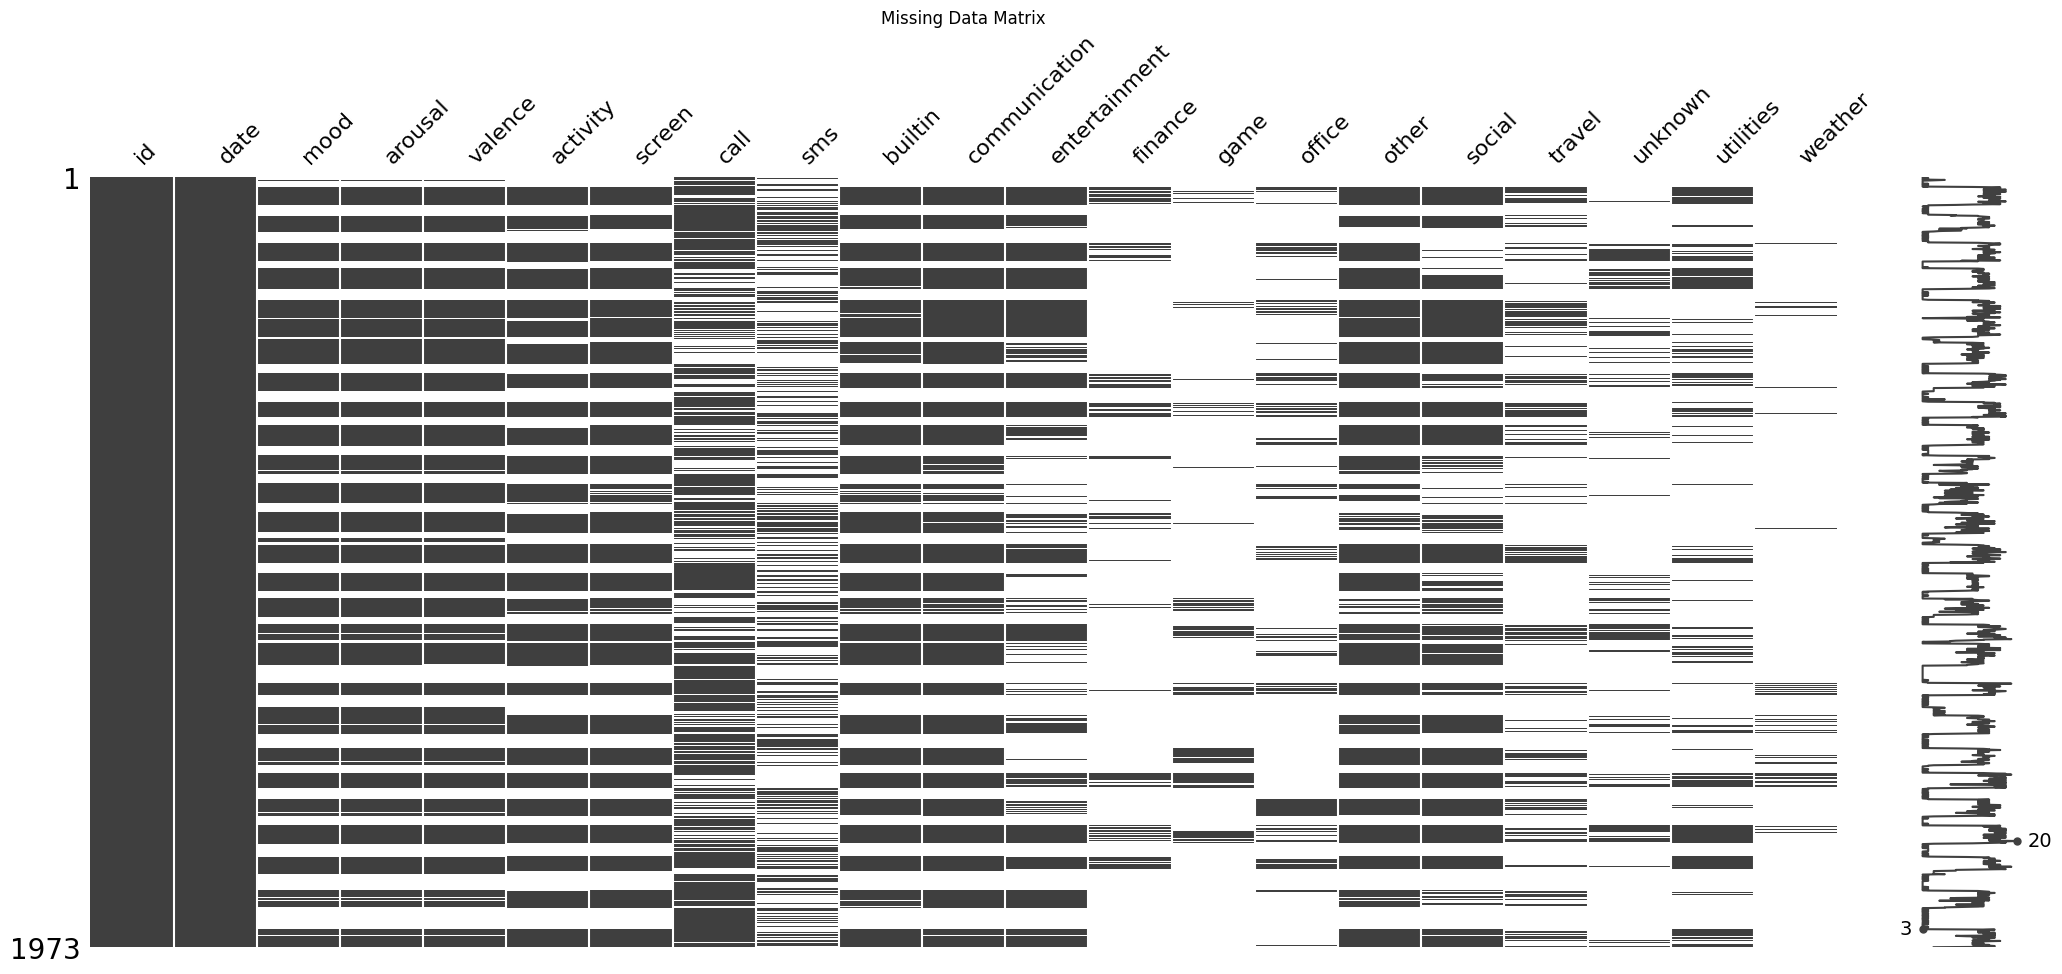

In [22]:
msno.matrix(transformed_df)

# add labels and display the plot
plt.title('Missing Data Matrix')
plt.show()


- Lot of missing values in Unknown, finance, game, weather.

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_43323/273651269.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = transformed_df.groupby('id').mean()


Text(0, 0.5, 'Means of Variables')

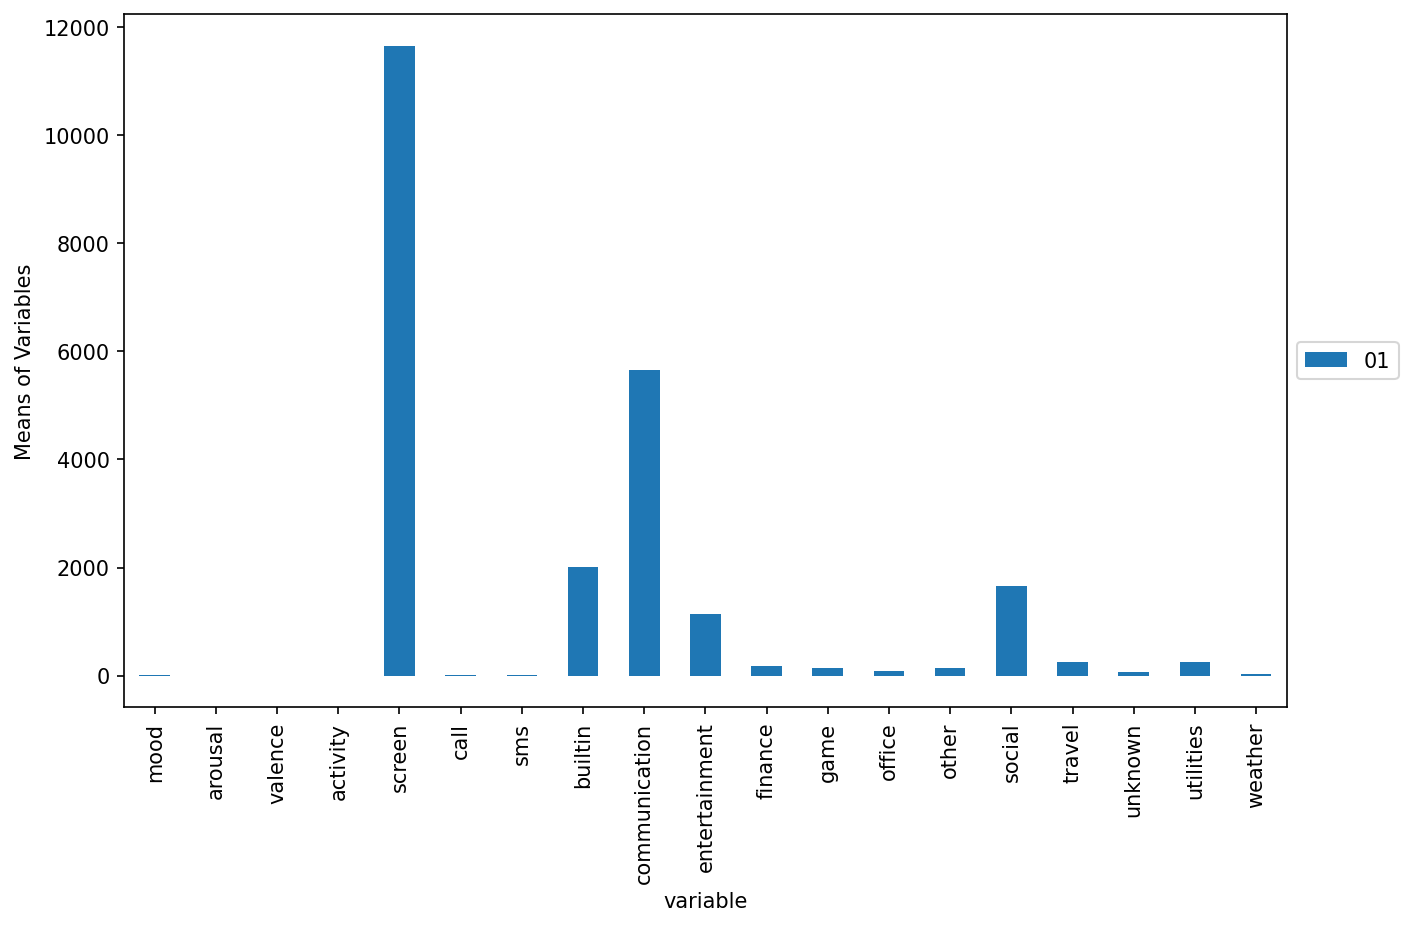

In [23]:
transformed_df['id'] = transformed_df['id'].astype(str)
grouped = transformed_df.groupby('id').mean()

# plot a bar chart of the mean 'value' for each category using matplotlib

plt.rcParams['figure.dpi'] = 150
grouped.loc['01'].plot(kind='bar',figsize=(10, 6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Means of Variables')


## Approach to the NaN's
- Eliminating the rows that have larger than 17 Nan's out of 19 features (too sparse of a data to analyze the day)

Planned methodologies:
1. KNN
2. ARIMA
3. KNN+ARIMA

In [24]:
transformed_df.columns

Index(['id', 'date', 'mood', 'arousal', 'valence', 'activity', 'screen',
       'call', 'sms', 'builtin', 'communication', 'entertainment', 'finance',
       'game', 'office', 'other', 'social', 'travel', 'unknown', 'utilities',
       'weather'],
      dtype='object', name='variable')

In [25]:
transformed_df.set_index('date',inplace=True)

print(transformed_df.index)
transformed_df.dtypes


DatetimeIndex(['2014-02-17', '2014-02-18', '2014-02-19', '2014-02-20',
               '2014-02-21', '2014-02-22', '2014-02-25', '2014-02-26',
               '2014-02-27', '2014-02-28',
               ...
               '2014-05-22', '2014-05-23', '2014-05-24', '2014-05-25',
               '2014-05-26', '2014-05-27', '2014-05-28', '2014-05-29',
               '2014-05-30', '2014-05-31'],
              dtype='datetime64[ns]', name='date', length=1973, freq=None)


variable
id                object
mood             float64
arousal          float64
valence          float64
activity         float64
screen           float64
call             float64
sms              float64
builtin          float64
communication    float64
entertainment    float64
finance          float64
game             float64
office           float64
other            float64
social           float64
travel           float64
unknown          float64
utilities        float64
weather          float64
dtype: object

In [26]:
(transformed_df.isnull().sum(axis=1)>=17).sum()

666

In [27]:
# eliminating 666 rows
transformed_df = transformed_df[transformed_df.isnull().sum(axis=1)<=17]

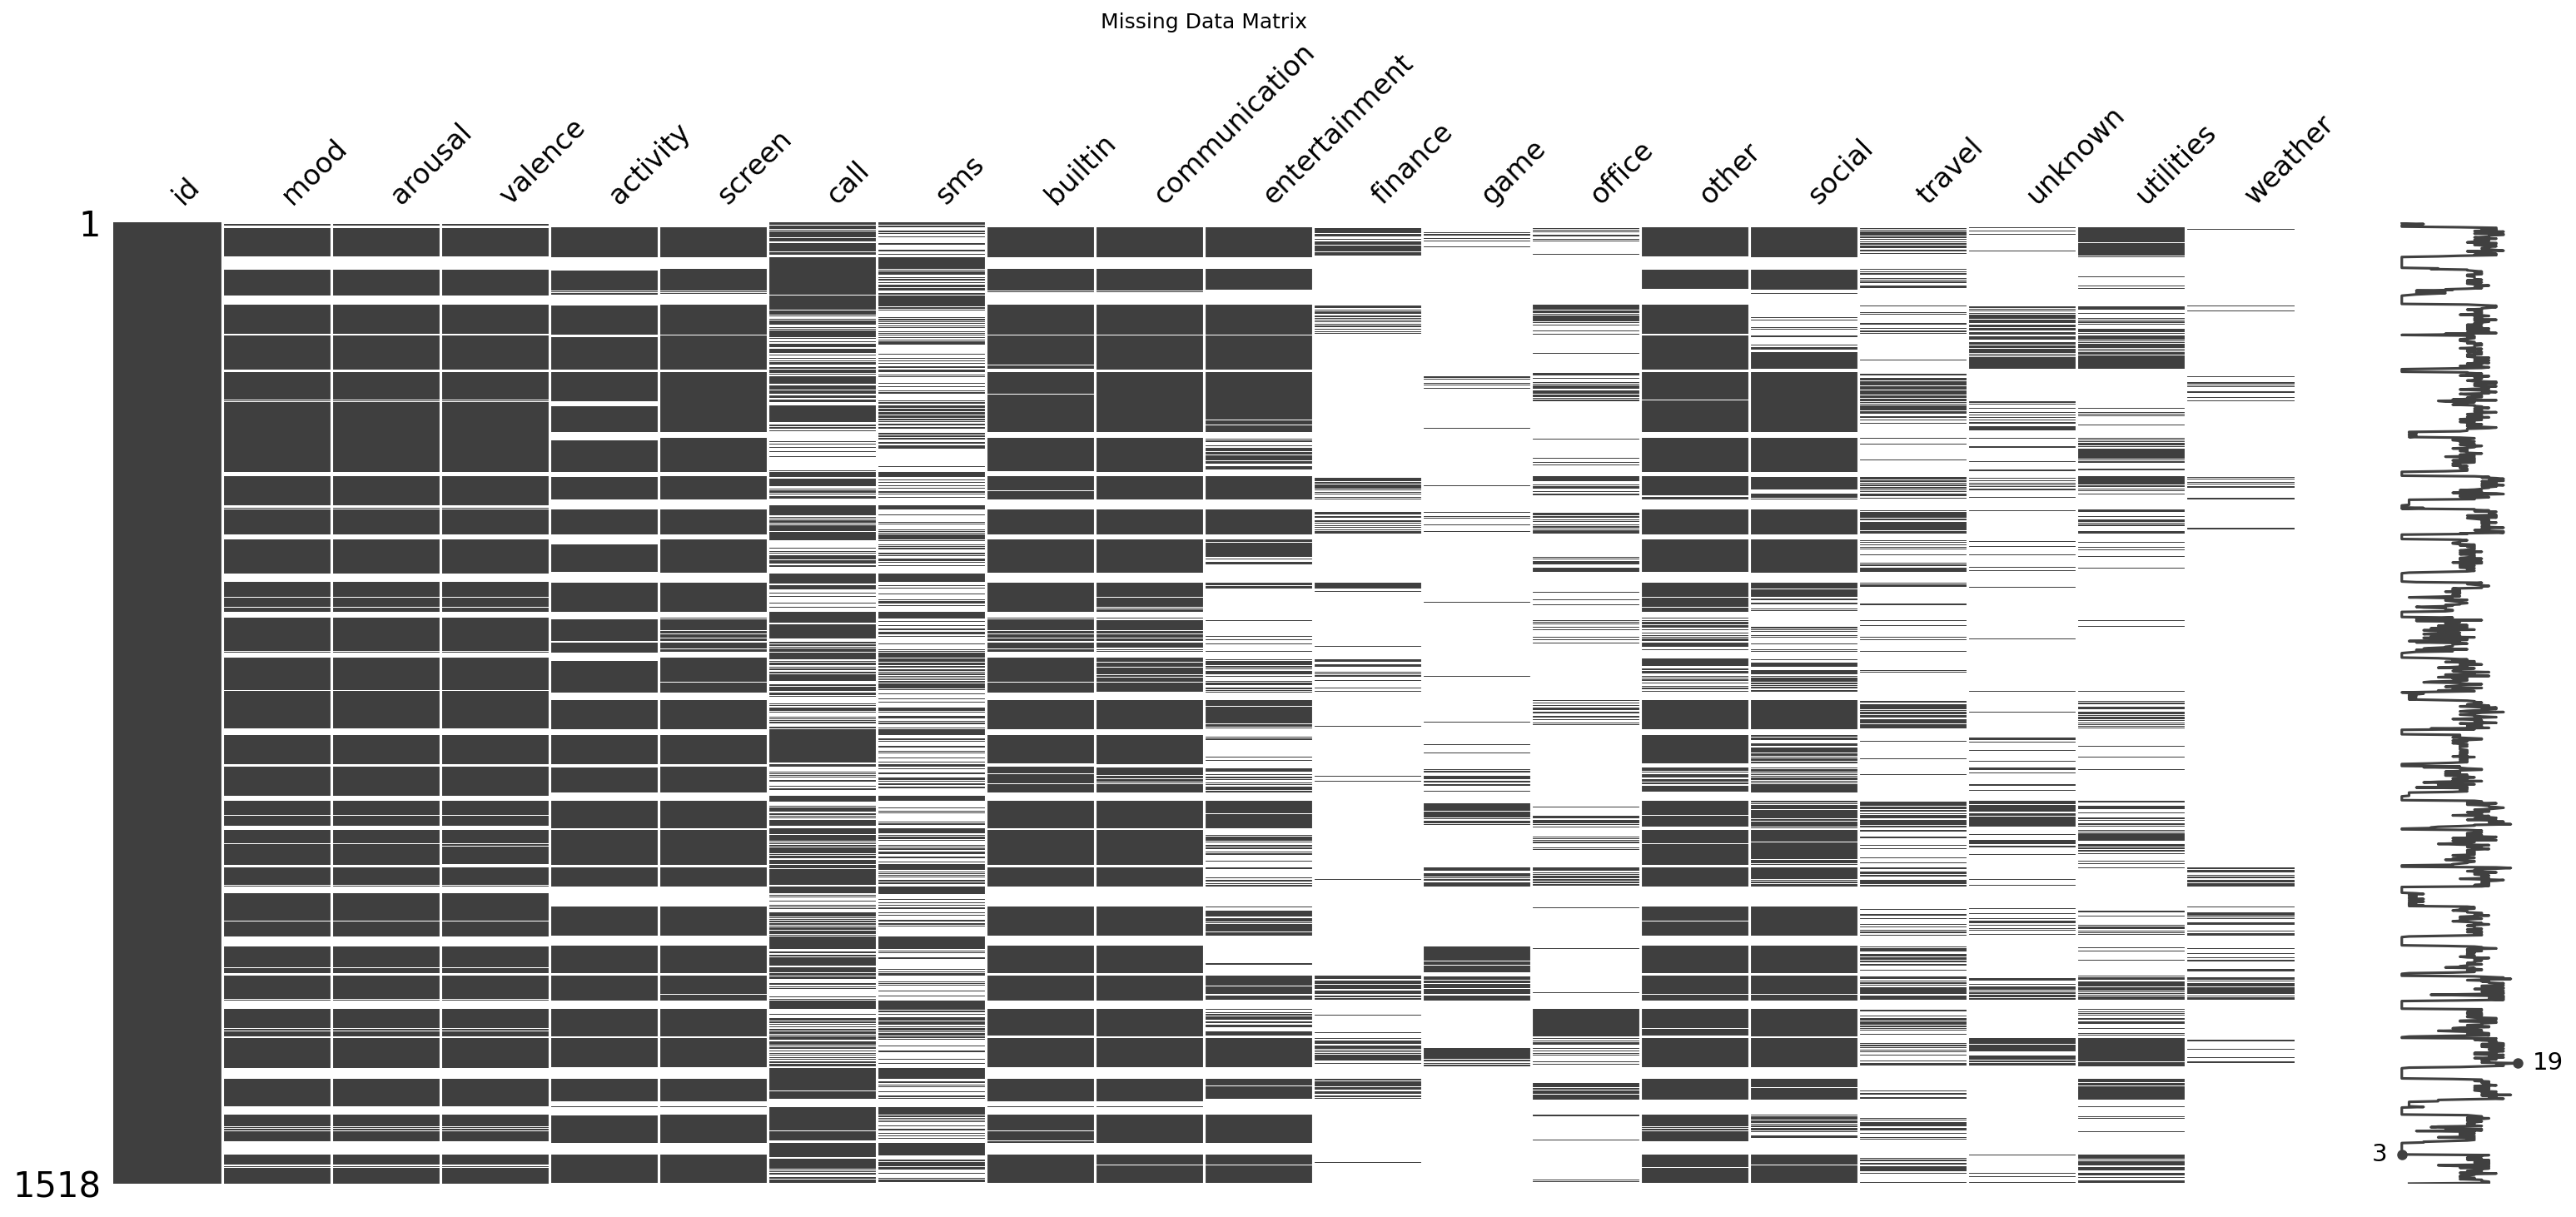

In [28]:
msno.matrix(transformed_df)

# add labels and display the plot
plt.title('Missing Data Matrix')
plt.show()

In [29]:
#knn imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=9)


transformed_df_copy = transformed_df.copy()
transformed_df_copy.reset_index(inplace=True)
grouped = transformed_df_copy.groupby('id')

imputed_df = pd.DataFrame()
for name, group in grouped:
    # Get the feature names for imputation
    feature_names = list(set(group.columns) - set(['date','id']))
    print(feature_names)
    # Loop through each feature and impute missing values with KNN
    for feature_name in feature_names:
        print(feature_name)
        # Convert the feature to a numpy array for imputation
        feature = group[feature_name].values.reshape(-1, 1)
        # Perform KNN imputation
        feature_imputed = imputer.fit_transform(feature)
        # Replace the missing values with the imputed values
        group[feature_name] = feature_imputed
    imputed_df = pd.concat([imputed_df,group])
        
    # Replace the group in the original DataFrame
    #transformed_df_copy.loc[transformed_df_copy['id'] == name] = group

imputed_df.head(10)

['weather', 'unknown', 'mood', 'sms', 'game', 'other', 'activity', 'travel', 'utilities', 'finance', 'social', 'valence', 'call', 'communication', 'office', 'screen', 'builtin', 'entertainment', 'arousal']
weather
unknown
mood
sms
game
other
activity
travel
utilities
finance
social
valence
call
communication
office
screen
builtin
entertainment
arousal
['weather', 'unknown', 'mood', 'sms', 'game', 'other', 'activity', 'travel', 'utilities', 'finance', 'social', 'valence', 'call', 'communication', 'office', 'screen', 'builtin', 'entertainment', 'arousal']
weather
unknown
mood
sms
game
other
activity
travel
utilities
finance
social
valence
call
communication
office
screen
builtin
entertainment
arousal
['weather', 'unknown', 'mood', 'sms', 'game', 'other', 'activity', 'travel', 'utilities', 'finance', 'social', 'valence', 'call', 'communication', 'office', 'screen', 'builtin', 'entertainment', 'arousal']
weather
unknown
mood
sms
game
other
activity
travel
utilities
finance
social
valence
c

variable       date  id      mood   arousal   valence  activity        screen  \
0        2014-02-19  01  7.062411 -0.243262  0.700709  0.090464  11660.409979   
1        2014-02-20  01  7.062411 -0.243262  0.700709  0.090464  11660.409979   
2        2014-02-22  01  7.062411 -0.243262  0.700709  0.090464  11660.409979   
3        2014-02-26  01  6.250000 -0.250000  0.750000  0.090464  11660.409979   
4        2014-02-27  01  6.333333  0.000000  0.333333  0.090464  11660.409979   
5        2014-03-12  01  7.062411 -0.243262  0.700709  0.090464  11660.409979   
6        2014-03-14  01  7.062411 -0.243262  0.700709  0.090464  11660.409979   
7        2014-03-18  01  7.062411 -0.243262  0.700709  0.090464  11660.409979   
8        2014-03-20  01  7.062411 -0.243262  0.700709  0.081548   2275.944000   
9        2014-03-21  01  6.200000  0.200000  0.200000  0.134050  17978.907000   

variable      call  sms      builtin  ...  entertainment     finance     game  \
0         7.000000  2.0  2008.627532  ...    1130.716447  179.156406  142.401   
1         2.000000  3.0  2008.627532  ...    1130.716447  179.156406  142.401   
2         2.000000  1.0  2008.627532  ...    1130.716447  179.156406  142.401   
3         1.000000  2.0  2008.627532  ...    1130.716447  179.156406  142.401   
4         3.179487  1.6  2008.627532  ...    1130.716447  179.156406  142.401   
5         7.000000  1.0  2008.627532  ...    1130.716447  179.156406  142.401   
6         3.000000  1.0  2008.627532  ...    1130.716447  179.156406  142.401   
7         1.000000  2.0  2008.627532  ...    1130.716447  179.156406  142.401   
8         1.000000  1.6   248.979000  ...     350.856000  179.156406  142.401   
9         6.000000  1.6  3139.218000  ...    1007.456000   49.544000  142.401   

variable   office       other       social     travel  unknown   utilities  \
0          76.117  133.847826  1665.562106  248.41152  68.2355  257.370511   
1          76.117  133.847826  1665.562106  248.41152  68.2355  257.370511   
2          76.117  133.847826  1665.562106  248.41152  68.2355  257.370511   
3          76.117  133.847826  1665.562106  248.41152  68.2355  257.370511   
4          76.117  133.847826  1665.562106  248.41152  68.2355  257.370511   
5          76.117  133.847826  1665.562106  248.41152  68.2355  257.370511   
6          76.117  133.847826  1665.562106  248.41152  68.2355  257.370511   
7          76.117  133.847826  1665.562106  248.41152  68.2355  257.370511   
8          76.117   11.345000   807.731000  248.41152  45.1730   21.074000   
9         172.206  239.751000  4508.500000  915.44500  68.2355  598.754000   

variable  weather  
0          30.386  
1          30.386  
2          30.386  
3          30.386  
4          30.386  
5          30.386  
6          30.386  
7          30.386  
8          30.386  
9          30.386  

[10 rows x 21 columns]

In [30]:
imputed_df.isna().sum()


variable
date               0
id                 0
mood               0
arousal            0
valence            0
activity           0
screen             0
call               0
sms                0
builtin            0
communication      0
entertainment      0
finance          694
game             742
office           277
other              0
social             0
travel             0
unknown          232
utilities         51
weather          870
dtype: int64

In [31]:
# since the data in features like finance, game, office, unknown, utilities, weather still has null values, it suggests that these features are too sparse to be imputed
grouped_median = imputed_df.groupby('id').median()
grouped_median['mood']['01']
#grouped

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_43323/271314082.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_median = imputed_df.groupby('id').median()


7.06241134751773

In [32]:

# Group the data by 'id'
grouped = imputed_df.groupby('id')
grouped_median = imputed_df.groupby('id').median()

# Create an imputed dataframe
imputed_df_KNN = pd.DataFrame()

# Loop through each group
for name, group in grouped:
    # Get the feature names for imputation
    feature_names = list(set(group.columns) - set(['date', 'id']))
    # Loop through each feature and impute missing values with the median
    for feature_name in feature_names:
        # Impute the missing values with the median
        group[feature_name].fillna(value = grouped_median[feature_name][name],inplace = True)
        #print(group.isna().sum())
        # Replace the missing values with the imputed values
        
    
    # Add the imputed group to the imputed dataframe
    if group.isna().sum().sum() > 0:
        # If there are NaNs, replace them with the median of the entire dataset
        group.fillna(value=group[feature_names].median(), inplace=True)

    imputed_df_KNN = pd.concat([imputed_df_KNN, group])

imputed_df_KNN.isna().sum()

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_43323/8744364.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_median = imputed_df.groupby('id').median()


variable
date               0
id                 0
mood               0
arousal            0
valence            0
activity           0
screen             0
call               0
sms                0
builtin            0
communication      0
entertainment      0
finance          694
game             742
office           277
other              0
social             0
travel             0
unknown          232
utilities         51
weather          870
dtype: int64

In [33]:
from sklearn.impute import SimpleImputer

# Create the imputer object with strategy as 'median'
imputer = SimpleImputer(strategy='median')
dropped = imputed_df.drop(['date', 'id'], axis=1)

features_to_impute = pd.DataFrame(imputer.fit_transform(dropped), columns = dropped.columns)# Impute missing values in the dataframe
imputed_df_KNN = pd.concat([imputed_df[['date', 'id']],features_to_impute],axis = 1)
imputed_df_KNN['mood'] = imputed_df_KNN['mood'].astype(int)

In [34]:
imputed_df_KNN.describe().T


count         mean          std        min          25%  \
variable                                                                  
mood           1518.0     6.606061     0.753994      3.000     6.000000   
arousal        1518.0    -0.101083     0.618772     -2.000    -0.451220   
valence        1518.0     0.681022     0.407725     -1.250     0.400450   
activity       1518.0     0.121520     0.093110      0.000     0.063980   
screen         1518.0  5917.782133  4408.405188      0.462  2632.746000   
call           1518.0     3.641353     3.085546      1.000     2.000000   
sms            1518.0     2.467266     1.705357      1.000     1.439024   
builtin        1518.0  1450.473485  3447.358376 -80367.930   331.577500   
communication  1518.0  2575.555823  2281.717411      1.095   940.765750   
entertainment  1518.0   921.205486  1533.905340      1.014   207.012000   
finance        1518.0    77.070895    71.623464      1.004    62.545500   
game           1518.0   408.689319   844.707910      1.010   169.699000   
office         1518.0   222.851399   978.615463      0.044    48.857000   
other          1518.0   166.873688   345.017256      2.007    47.624000   
social         1518.0  1230.214678  1765.018051      0.725   170.771500   
travel         1518.0   257.977988   418.138649      0.080    95.693400   
unknown        1518.0   139.519272   223.918328      0.111    23.129000   
utilities      1518.0    68.471296   143.185030      1.002    13.288286   
weather        1518.0    34.056957    19.530125      1.007    30.573500   

                       50%          75%           max  
variable                                               
mood              7.000000     7.000000      9.000000  
arousal          -0.056028     0.250629      2.000000  
valence           0.750000     1.000000      2.000000  
activity          0.097543     0.148617      0.566171  
screen         5009.230000  8077.911499  36204.105001  
call              2.931818     4.175532     31.000000  
sms               2.000000     3.000000     17.000000  
builtin         831.077500  1821.069083  40323.877000  
communication  2003.631000  3395.414250  20718.749000  
entertainment   474.573231  1110.096500  35937.645000  
finance          66.269308    69.804095   1321.104000  
game            169.699000   169.699000  12996.495000  
office           77.264700   127.803393  33283.021000  
other            74.700500   155.096600   4335.307000  
social          533.810000  1673.151250  30073.421000  
travel          171.179750   284.298286  10548.116000  
unknown          93.997000   153.644800   2821.547000  
utilities        26.423903    69.529000   2257.626000  
weather          30.573500    30.573500    366.937000

In [35]:
# interpolation imputation
grouped = transformed_df_copy.groupby('id')

imputed_df_inter = pd.DataFrame()
for name, group in grouped:
    # Get the feature names for imputation
    feature_names = list(set(group.columns) - set(['date','id']))
    print(feature_names)
    # Loop through each feature and impute missing values with interpolation
    for feature_name in feature_names:
        print(feature_name)
        # Interpolate missing values in the feature
        group[feature_name].interpolate(method='linear', limit_direction='both', inplace=True)
    imputed_df_inter= pd.concat([imputed_df_inter,group])

imputed_df_inter.head(10)

['weather', 'unknown', 'mood', 'sms', 'game', 'other', 'activity', 'travel', 'utilities', 'finance', 'social', 'valence', 'call', 'communication', 'office', 'screen', 'builtin', 'entertainment', 'arousal']
weather
unknown
mood
sms
game
other
activity
travel
utilities
finance
social
valence
call
communication
office
screen
builtin
entertainment
arousal
['weather', 'unknown', 'mood', 'sms', 'game', 'other', 'activity', 'travel', 'utilities', 'finance', 'social', 'valence', 'call', 'communication', 'office', 'screen', 'builtin', 'entertainment', 'arousal']
weather
unknown
mood
sms
game
other
activity
travel
utilities
finance
social
valence
call
communication
office
screen
builtin
entertainment
arousal
['weather', 'unknown', 'mood', 'sms', 'game', 'other', 'activity', 'travel', 'utilities', 'finance', 'social', 'valence', 'call', 'communication', 'office', 'screen', 'builtin', 'entertainment', 'arousal']
weather
unknown
mood
sms
game
other
activity
travel
utilities
finance
social
valence
c

variable       date  id      mood  arousal   valence  activity     screen  \
0        2014-02-19  01  6.250000    -0.25  0.750000  0.081548   2275.944   
1        2014-02-20  01  6.250000    -0.25  0.750000  0.081548   2275.944   
2        2014-02-22  01  6.250000    -0.25  0.750000  0.081548   2275.944   
3        2014-02-26  01  6.250000    -0.25  0.750000  0.081548   2275.944   
4        2014-02-27  01  6.333333     0.00  0.333333  0.081548   2275.944   
5        2014-03-12  01  6.306667     0.04  0.306667  0.081548   2275.944   
6        2014-03-14  01  6.280000     0.08  0.280000  0.081548   2275.944   
7        2014-03-18  01  6.253333     0.12  0.253333  0.081548   2275.944   
8        2014-03-20  01  6.226667     0.16  0.226667  0.081548   2275.944   
9        2014-03-21  01  6.200000     0.20  0.200000  0.134050  17978.907   

variable  call       sms   builtin  ...  entertainment  finance     game  \
0          7.0  2.000000   248.979  ...        350.856   49.544  233.036   
1          2.0  3.000000   248.979  ...        350.856   49.544  233.036   
2          2.0  1.000000   248.979  ...        350.856   49.544  233.036   
3          1.0  2.000000   248.979  ...        350.856   49.544  233.036   
4          4.0  1.500000   248.979  ...        350.856   49.544  233.036   
5          7.0  1.000000   248.979  ...        350.856   49.544  233.036   
6          3.0  1.000000   248.979  ...        350.856   49.544  233.036   
7          1.0  2.000000   248.979  ...        350.856   49.544  233.036   
8          1.0  1.666667   248.979  ...        350.856   49.544  233.036   
9          6.0  1.333333  3139.218  ...       1007.456   49.544  233.036   

variable   office    other    social   travel  unknown  utilities  weather  
0         172.206   11.345   807.731  915.445   45.173     21.074   30.386  
1         172.206   11.345   807.731  915.445   45.173     21.074   30.386  
2         172.206   11.345   807.731  915.445   45.173     21.074   30.386  
3         172.206   11.345   807.731  915.445   45.173     21.074   30.386  
4         172.206   11.345   807.731  915.445   45.173     21.074   30.386  
5         172.206   11.345   807.731  915.445   45.173     21.074   30.386  
6         172.206   11.345   807.731  915.445   45.173     21.074   30.386  
7         172.206   11.345   807.731  915.445   45.173     21.074   30.386  
8         172.206   11.345   807.731  915.445   45.173     21.074   30.386  
9         172.206  239.751  4508.500  915.445   83.183    598.754   30.386  

[10 rows x 21 columns]

In [36]:
# Create the imputer object with strategy as 'median'
imputer = SimpleImputer(strategy='median')
dropped = imputed_df_inter.drop(['date', 'id'], axis=1)

features_to_impute = pd.DataFrame(imputer.fit_transform(dropped), columns = dropped.columns)# Impute missing values in the dataframe
imputed_df_interpolate = pd.concat([imputed_df[['date', 'id']],features_to_impute],axis = 1)
imputed_df_interpolate['mood'] = imputed_df_interpolate['mood'].astype(int)
imputed_df_interpolate.isna().sum()

variable
date             0
id               0
mood             0
arousal          0
valence          0
activity         0
screen           0
call             0
sms              0
builtin          0
communication    0
entertainment    0
finance          0
game             0
office           0
other            0
social           0
travel           0
unknown          0
utilities        0
weather          0
dtype: int64

In [37]:
from scipy.stats import ttest_ind
import numpy as np

t1, p1 = ttest_ind(np.asarray(transformed_df_copy.drop(columns=['date','id'])).flatten(), np.asarray(imputed_df.drop(columns=['date','id'])).flatten(), nan_policy='omit')
# Compute the MSE for the KNN imputed dataset
#knn_mse = mean_squared_error(transformed_df_copy.drop(columns=['date','id']), imputed_df.drop(columns=['date','id']))

# Compute the MSE for the interpolation imputed dataset
#interp_mse = mean_squared_error(transformed_df_copy, imputed_df_inter)

# Print the MSE for both imputed datasets
t2,p2 = ttest_ind(np.asarray(transformed_df_copy.drop(columns=['date','id'])).flatten(), np.asarray(imputed_df_inter.drop(columns=['date','id'])).flatten(), nan_policy='omit')
#print(f"Interpolation Imputation MSE: {interp_mse}")
p1,p2


(8.438716371780074e-23, 2.0864569832081726e-38)

## Feature Engineering

First we will create some plots based on the imputed dataset to understand the relationship between the different features

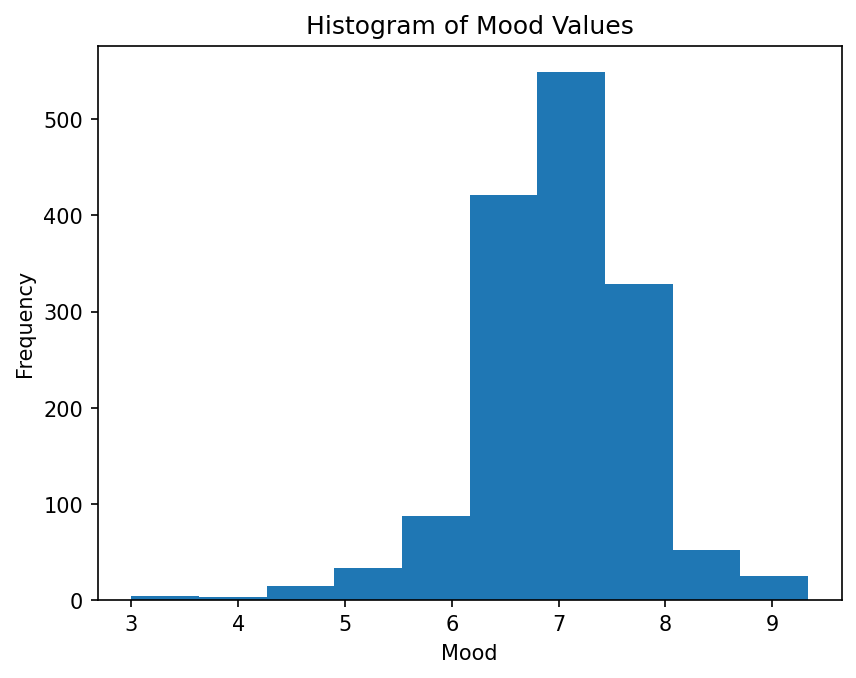

In [ ]:
# Histogram of mood values
plt.hist(imputed_df_inter['mood'], bins=10)
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.title('Histogram of Mood Values')
plt.show()


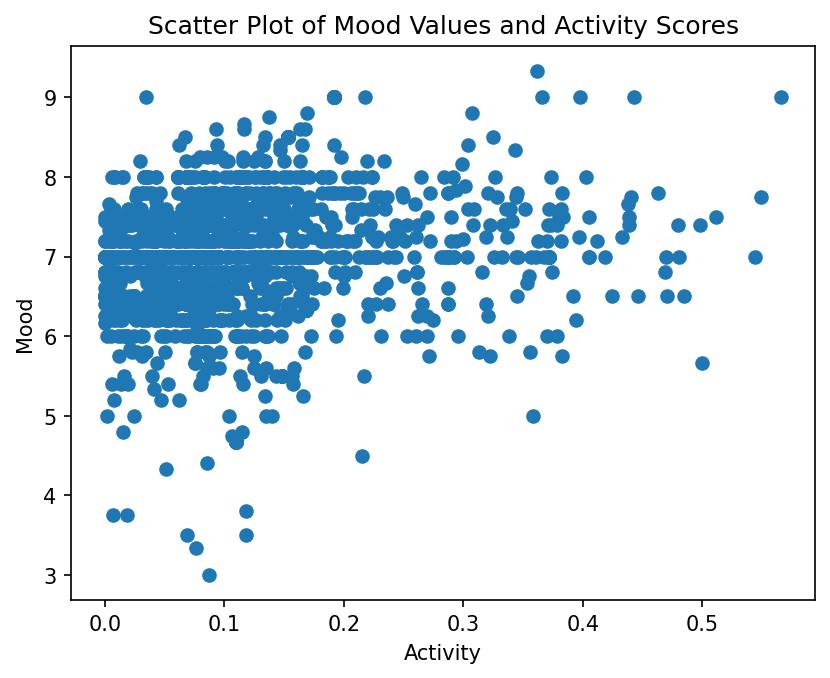

In [ ]:
# Scatter plot of mood values and activity scores
plt.scatter(imputed_df_inter['activity'], imputed_df_inter['mood'])
plt.xlabel('Activity')
plt.ylabel('Mood')
plt.title('Scatter Plot of Mood Values and Activity Scores')
plt.show()



<Figure size 1200x900 with 0 Axes>

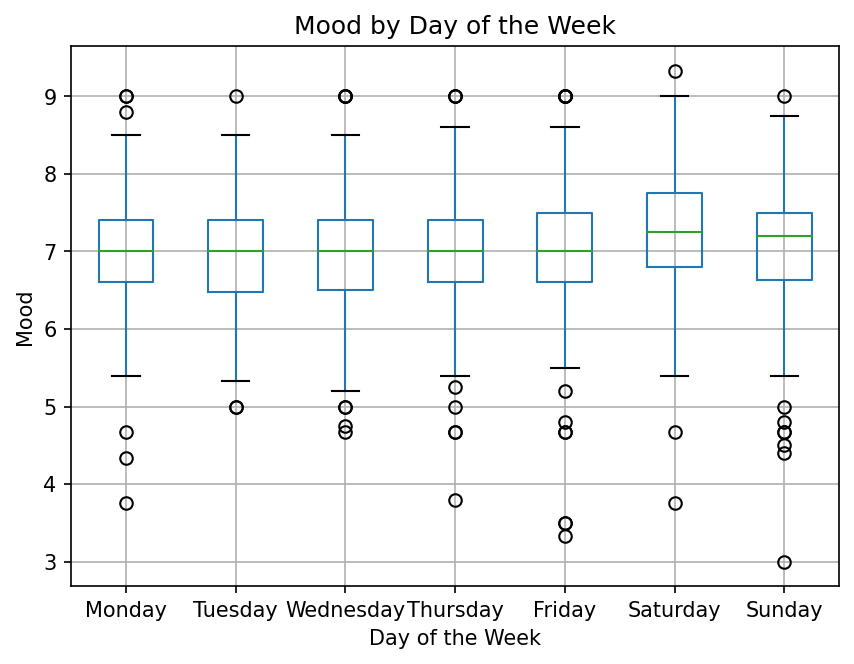

In [ ]:
# Box plot of mood values by day of the week
df_copy = imputed_df_inter.copy()
df_copy['time'] = pd.to_datetime(df_copy['date'])

# extract day of the week from time column
df_copy['day_of_week'] = df_copy['time'].dt.day_name()


# convert day_of_week column to categorical variable with days in order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_copy['day_of_week'] = pd.Categorical(df_copy['day_of_week'], categories=weekday_order, ordered=True)


# create a box plot of mood variable grouped by day of the week
plt.figure(figsize=(8,6))
df_copy.boxplot(column='mood', by='day_of_week')
plt.title('Mood by Day of the Week')
plt.suptitle('') # remove default title
plt.xlabel('Day of the Week')
plt.ylabel('Mood')
plt.show()

We can clearly see that the mean mood is higher on Saturdays and Sundays than on other days. 
So there is a distinct trend here regarding the day of the week and the mood.

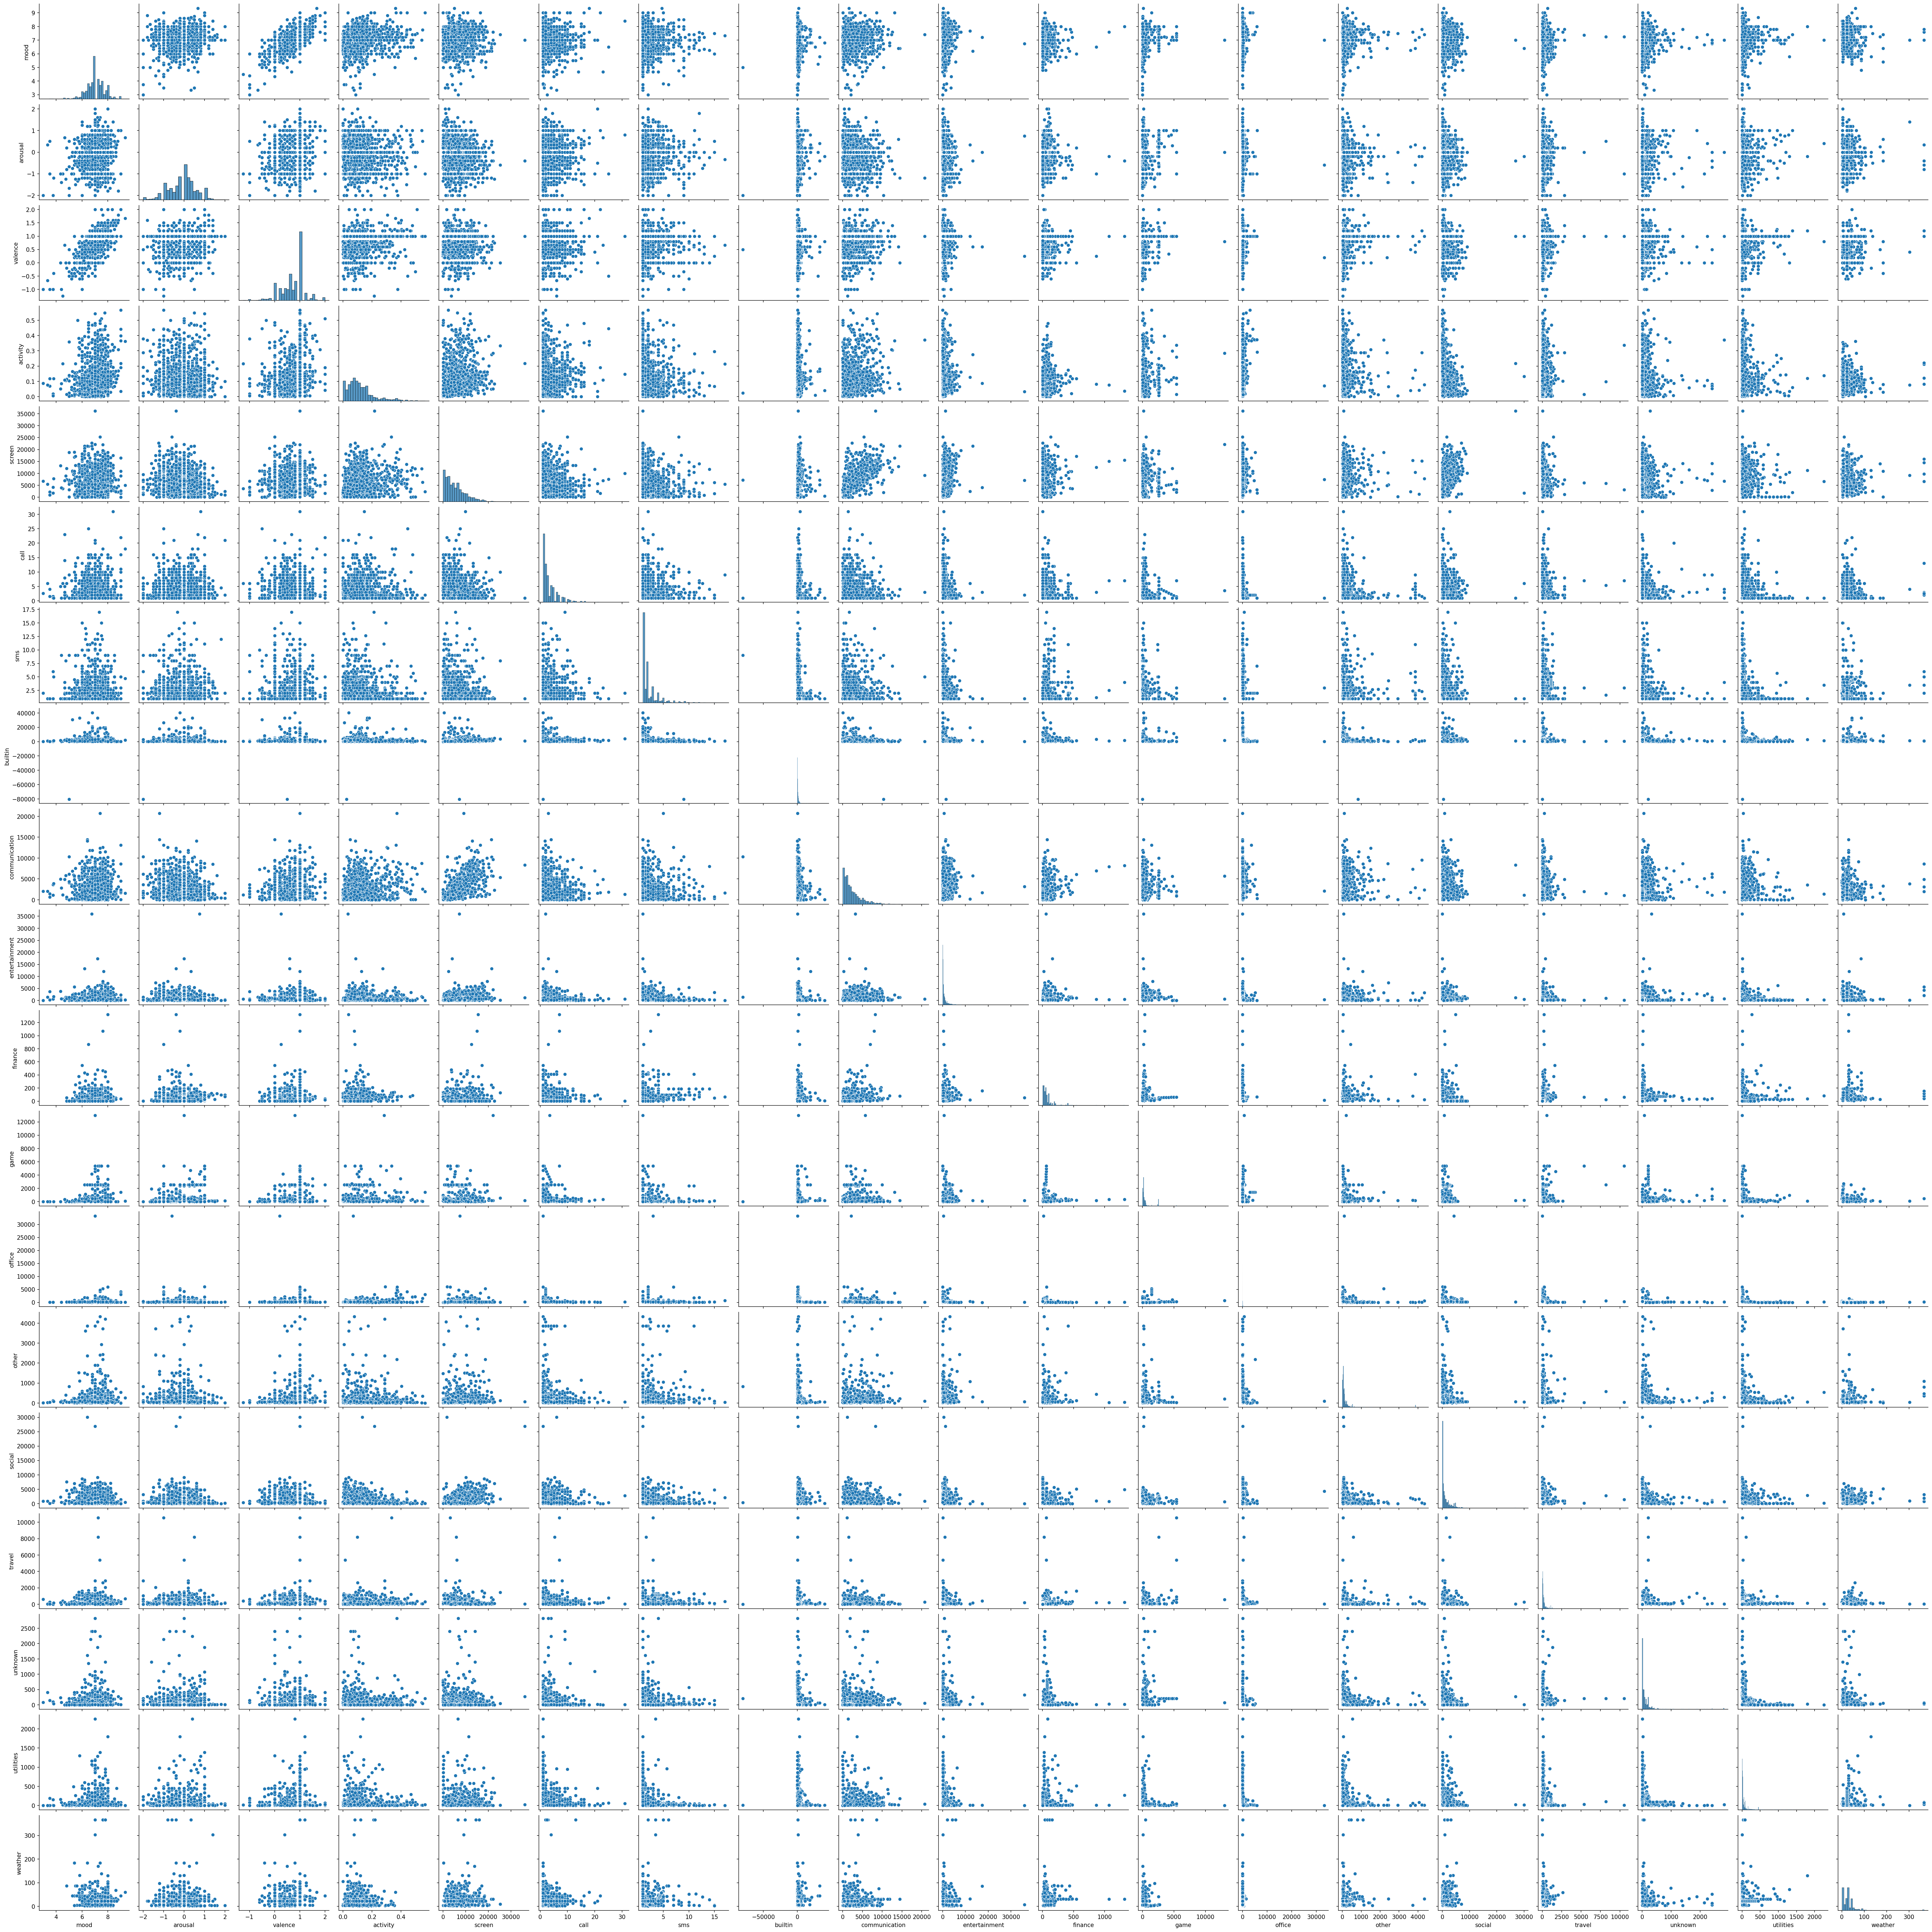

In [ ]:
# Pairplot
sns.pairplot(imputed_df_inter)

C:\Users\antge\AppData\Local\Temp\ipykernel_3848\2194229822.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = imputed_df_inter.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

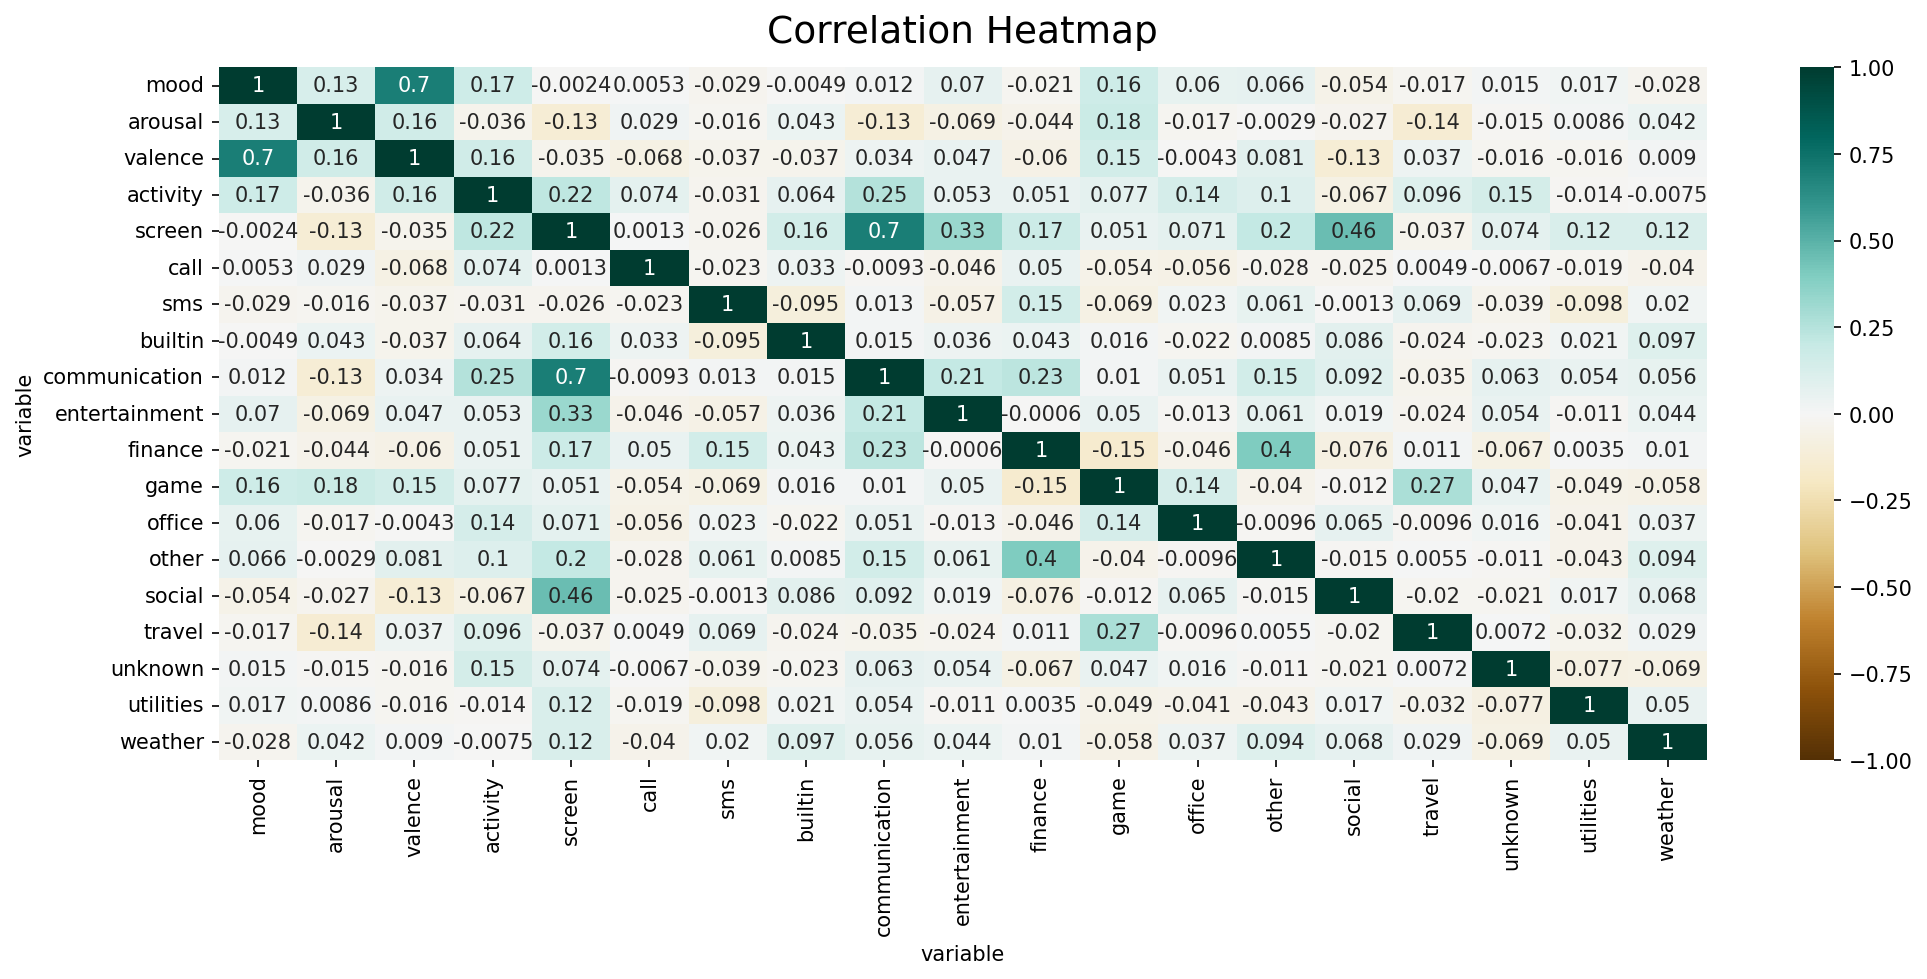

In [ ]:
# Let's now use a heatmap to find again correlations between the features

#correlation matrix
corr = imputed_df_inter.corr()
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

Stronger correlation happens between variables/features that have a 'darker' shade cell (on both ends), whereas weaker is between variables that have a lighter shade cell.

So we can see a strong correlation between:
- 'mood' and 'valence'
- 'screen' and 'communication'
- 'screen' and 'social'
- 'finance' and 'other'

As one of those values increases, the other is also likely to be increased.

### Now we will plot the correlation of all features with regards to 'mood' only

C:\Users\antge\AppData\Local\Temp\ipykernel_3848\4108487626.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(imputed_df_inter.corr()[['mood']].sort_values(by='mood', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


Text(0.5, 1.0, 'Features Correlating with mood')

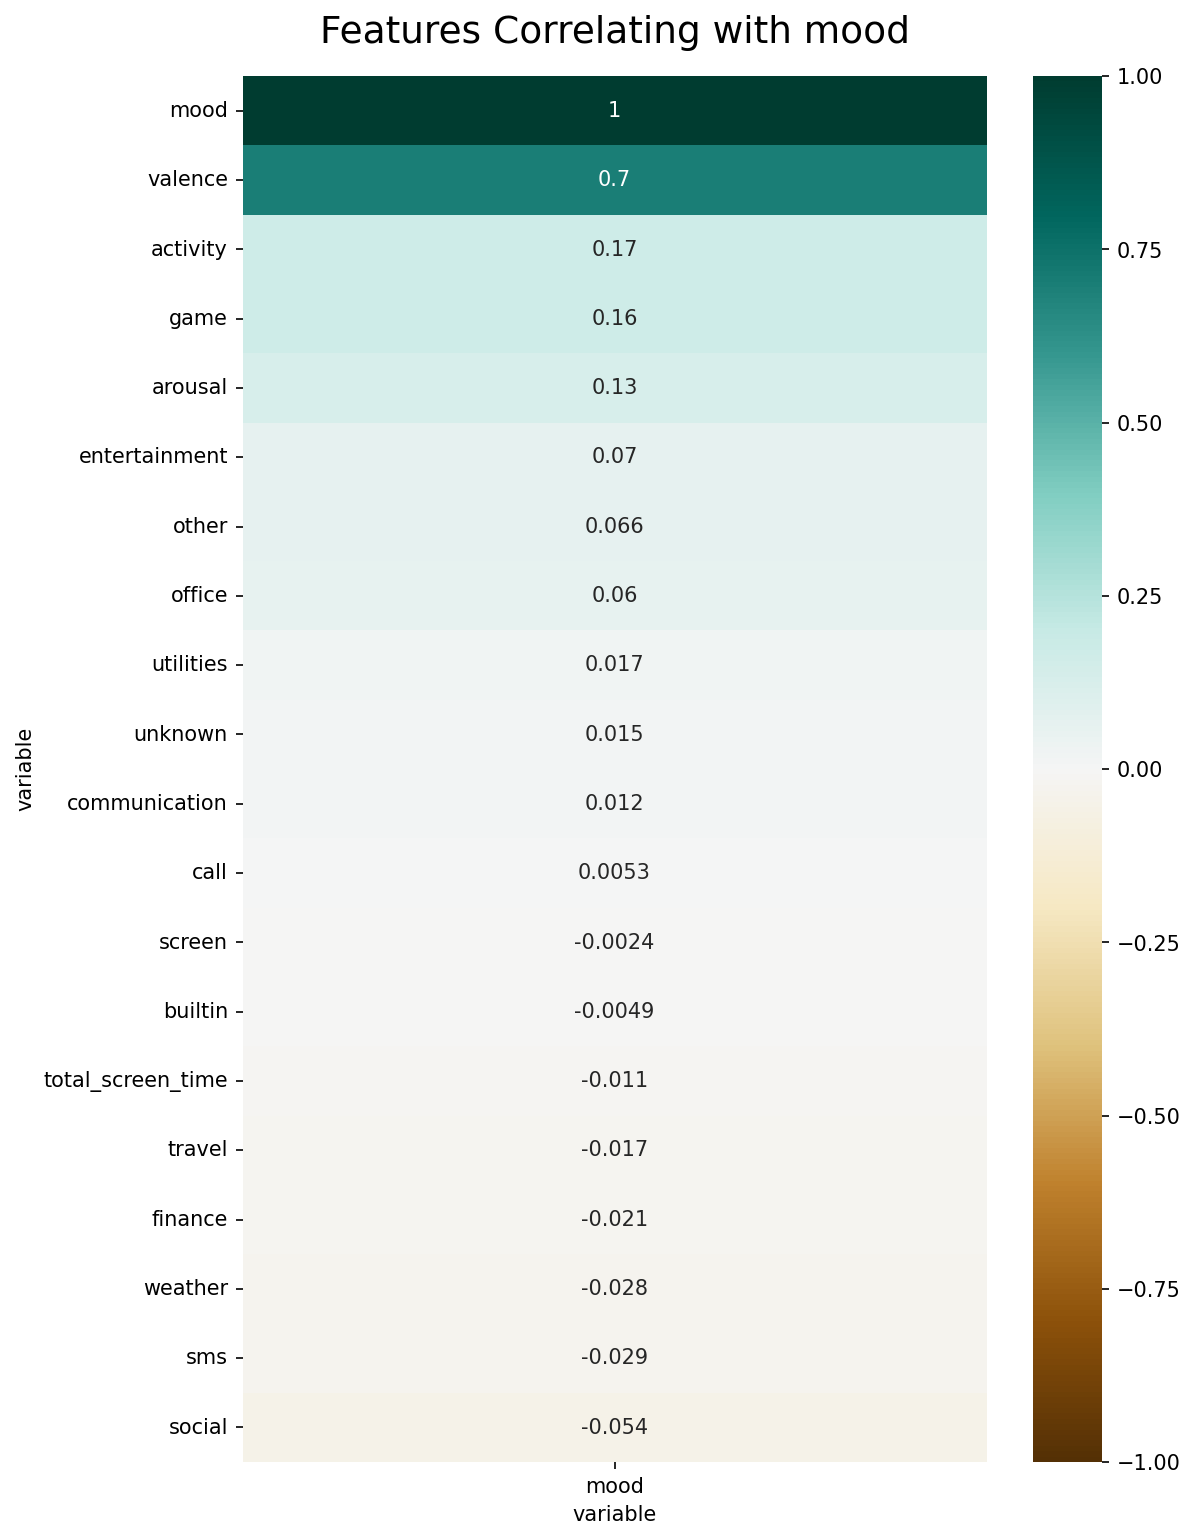

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(imputed_df_inter.corr()[['mood']].sort_values(by='mood', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with mood', fontdict={'fontsize':18}, pad=16)

C:\Users\antge\AppData\Local\Temp\ipykernel_3848\477263910.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(total_screen_time_df.corr()[['mood']].sort_values(by='mood', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


Text(0.5, 1.0, 'Features Correlating with mood')

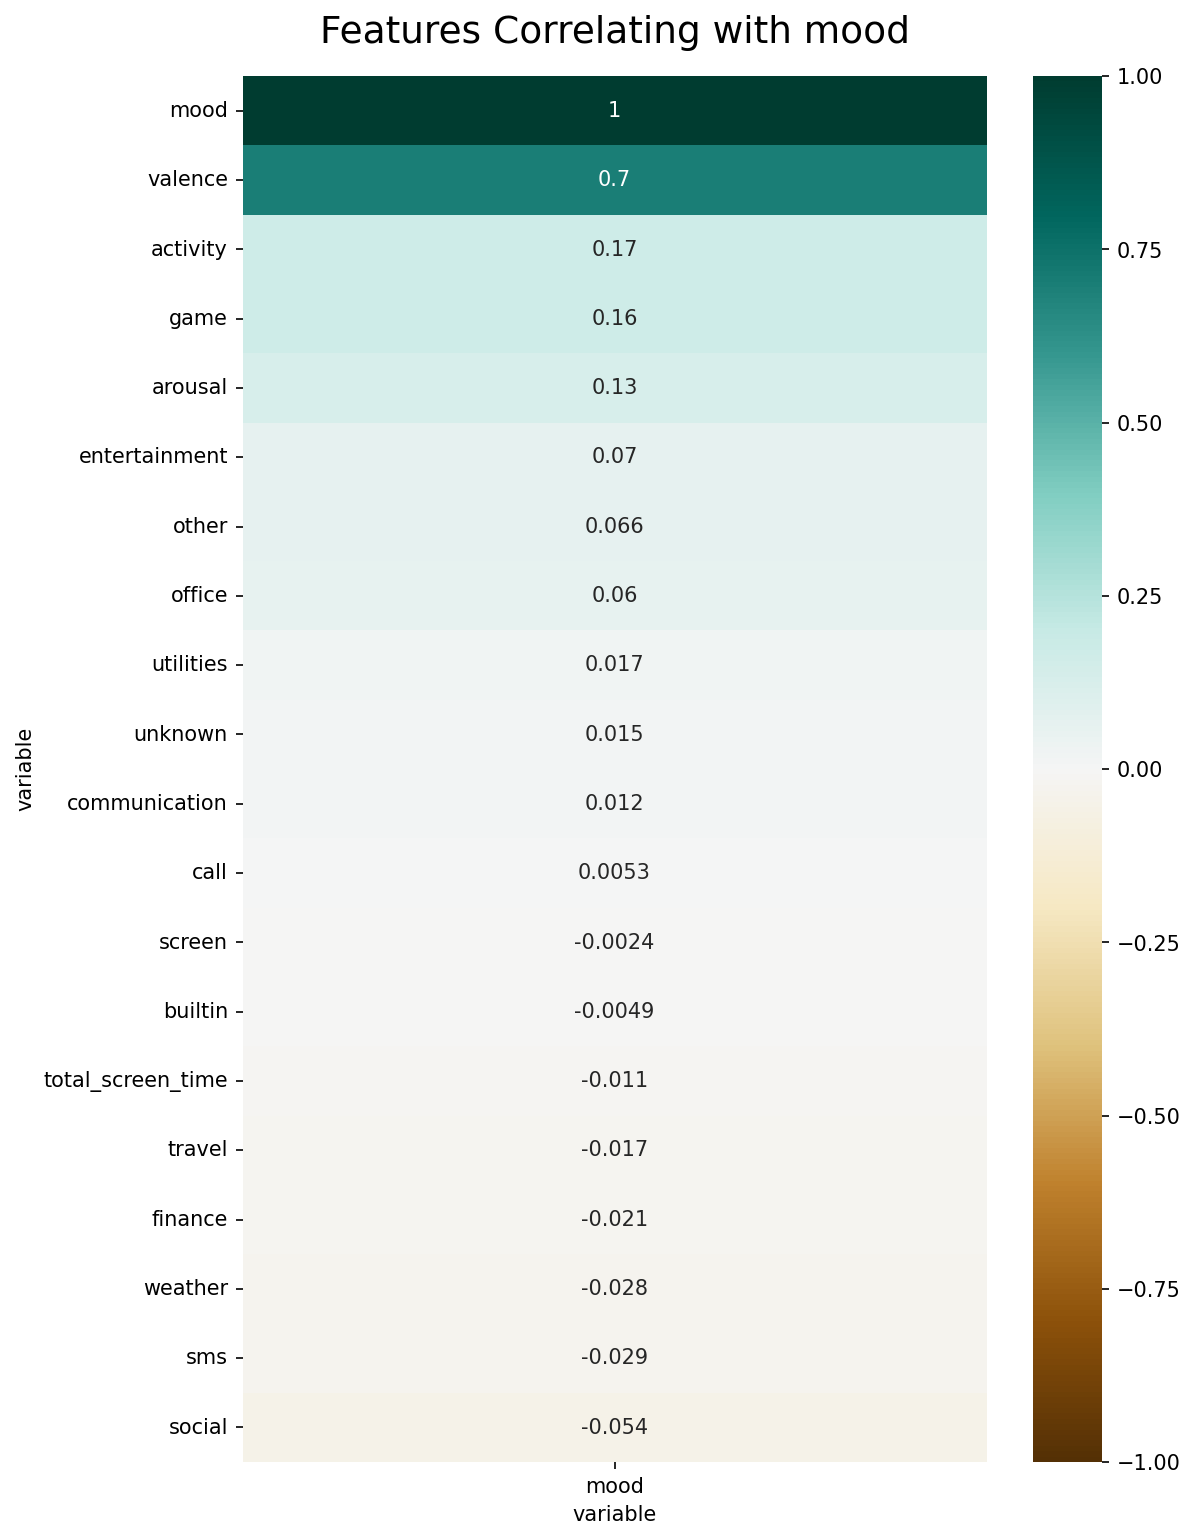

In [ ]:
total_screen_time_df = imputed_df_inter.copy()
total_screen_time_df["total_screen_time"] = imputed_df_inter['screen'] + imputed_df_inter['communication'] + imputed_df_inter['social']
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(total_screen_time_df.corr()[['mood']].sort_values(by='mood', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with mood', fontdict={'fontsize':18}, pad=16)

### We will use PCA (Principal Component Analysis) to reduce the dimensionality of our dataframe and remove "social", "communication" and "screen" that could potentially cause a multicollinearity problem due to their high correlation values.

In [ ]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

components_df = imputed_df_inter.copy()
components_df.fillna(components_df.mean(), inplace=True)

# in order to do the PCA we need to first normalize the data
features = ['social', 'unknown', 'valence', 'activity', 'travel', 'sms', 'game', 'office', 'weather', 'screen', 'other', 'communication', 'finance', 'entertainment', 'builtin', 'call', 'arousal', 'utilities']

# get the features values
x = components_df.loc[:, features].values

# get the target values
y = components_df.loc[:,['mood']].values

# essentialy we want to standardize ONLY the features and not the target 'mood'
x = StandardScaler().fit_transform(x)


# Create a pca of at least 85% explained variance ratio
pca = PCA(.85)
principalComponents = pca.fit_transform(x)

newDataFrame = pd.concat([ pd.DataFrame(data=principalComponents), components_df[['mood']]], axis=1)


C:\Users\antge\AppData\Local\Temp\ipykernel_3848\3991332921.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  components_df.fillna(components_df.mean(), inplace=True)


In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.12641142 0.08040799 0.07931441 0.06946558 0.06348252 0.06156182
 0.06008693 0.05691809 0.0545431  0.05253899 0.05080492 0.04745949
 0.04592066 0.04006045]
0.8889763754616412


So we can follow the same approach but this time we can combine features together and recalculate the explained variance of the pca to ensure that we will have more than 85% of the information while having less dimensions.

In [ ]:
# combine 'social', 'communication' and 'screen' in one feature
modified_df = total_screen_time_df
modified_df.drop(['screen', 'communication', 'social'], axis=1)

components_df = modified_df.copy()
components_df.fillna(components_df.mean(), inplace=True)

# in order to do the PCA we need to first normalize the data
features = ['total_screen_time','unknown', 'valence', 'activity', 'travel', 'sms', 'game', 'office', 'weather', 'other', 'finance', 'entertainment', 'builtin', 'call', 'arousal', 'utilities']

# get the features values
x = components_df.loc[:, features].values

# get the target values
y = components_df.loc[:,['mood']].values

# essentialy we want to standardize ONLY the features and not the target 'mood'
x = StandardScaler().fit_transform(x)


# Create a pca of at least 85% explained variance ratio
pca = PCA(.85)
principalComponents = pca.fit_transform(x)

newDataFrame = pd.concat([ pd.DataFrame(data=principalComponents), components_df[['mood']]], axis=1)

C:\Users\antge\AppData\Local\Temp\ipykernel_3848\1086313334.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  components_df.fillna(components_df.mean(), inplace=True)


In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.10328937 0.08978433 0.08174607 0.07734121 0.06971898 0.06887001
 0.06479779 0.06264201 0.05927517 0.05710356 0.05629649 0.05275971
 0.04292503]
0.8865497405064443


In [ ]:
newDataFrame

0         1         2         3         4         5         6  \
0    -0.830083  0.045524  0.531373  0.618634 -0.164779  1.003729 -0.023857   
1    -0.805473  0.013923  0.801161  0.660395  0.738489  0.202615  0.029565   
2    -0.833444  0.256113  0.358700  0.513264  0.623875  0.307858 -0.147027   
3    -0.817334  0.152917  0.589642  0.580469  0.850375  0.105538 -0.065706   
4    -0.947019 -0.092800  0.259157  0.743033  0.200343  0.717914  0.012480   
...        ...       ...       ...       ...       ...       ...       ...   
1513 -1.040145 -0.497294 -0.577203  0.698691  0.850271 -0.478904  0.108826   
1514  0.787494  0.532412 -0.792318 -0.747966 -0.999771  0.558680  0.229009   
1515 -0.486035  0.456328 -0.284841  0.878934 -0.293931 -0.057692  0.279239   
1516  0.263211  0.220598 -1.187554  2.159544  0.507169  1.841635  0.832186   
1517  0.748227  0.994599 -0.578559  1.905124  0.974240  1.412635  0.463331   

             7         8         9        10        11        12      mood  
0     0.125184 -0.457989  0.651007 -0.388049  0.343966  0.646150  6.250000  
1     0.051322 -0.178200 -0.021122 -0.584561 -0.220291  0.425551  6.250000  
2     0.292600 -0.095486 -0.147444 -0.930575  0.428656  0.397874  6.250000  
3     0.181316 -0.072614 -0.231341 -0.831472  0.056226  0.364825  6.250000  
4    -0.068971  0.033950 -0.003507 -0.271720  0.517456  0.312390  6.333333  
...        ...       ...       ...       ...       ...       ...       ...  
1513 -0.130654  0.454844 -0.196118 -0.360217  0.300439 -0.580544  6.200000  
1514  0.028272 -0.223806  1.517510 -0.020894  0.333662 -0.477588  8.200000  
1515  0.667201 -0.668698  0.668130 -1.435769  0.365664 -0.659137  7.000000  
1516  0.536967  0.309197 -0.545343  0.062729  0.169753 -0.641765  6.800000  
1517  1.593216 -0.690575  0.081583 -1.577259 -0.328499 -0.047404  7.000000  

[1518 rows x 14 columns]

## 2A: Classification


In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = imputed_df_interpolate

# Split the data into training and testing sets
X = data.drop(['date', 'mood'], axis=1) # drop 'date' and 'mood' columns as they are not needed
y = data['mood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (e.g., scale the features)

# Create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42,)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Predict the next day's mood for the test data
y_pred = rfc.predict(X_test)

# Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7467105263157895


### Parameter tuning

Evaluation metrics:

Accuracy: It measures the proportion of correctly classified instances out of the total number of instances. However, it can be misleading when the classes are imbalanced.

Precision: It measures the proportion of true positives among all predicted positive instances. It is calculated per class, and it tells us how well the classifier performs when it predicts that an instance belongs to a certain class.

Recall: It measures the proportion of true positives among all actual positive instances. It is calculated per class, and it tells us how well the classifier detects instances of a certain class.

F1-score: It is the harmonic mean of precision and recall, and it provides a single metric that balances both measures.

Confusion matrix: It is a table that shows the number of true positives, true negatives, false positives, and false negatives for each class.

ROC curve: It is a curve that shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) at different classification thresholds.

AUC: It is the area under the ROC curve and provides a single metric that summarizes the overall performance of the classifier.

Log loss: It measures the logarithm of the likelihood of the true class, given the predicted probabilities.

In [42]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their ranges to test
param_dist = {
    'n_estimators': np.arange(50, 601, 10),
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': np.arange(2, 31),
    'min_samples_leaf': np.arange(1, 21)
}

# Use RandomizedSearchCV to search for the best hyperparameters
rs = RandomizedSearchCV(rfc, param_dist, n_iter=50, cv=5, n_jobs=-1, random_state=42)
rs.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print('Best Hyperparameters:', rs.best_params_)
print('Best Score:', rs.best_score_)




Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 20}
Best Score: 0.7356222154201952


In [46]:
# Train a new model on the full training set using the best hyperparameters
best_rfc = RandomForestClassifier(random_state=42, **rs.best_params_)
best_rfc.fit(X_train, y_train)

# Predict the next day's mood for the test data
y_pred = best_rfc.predict(X_test)

# Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7532894736842105


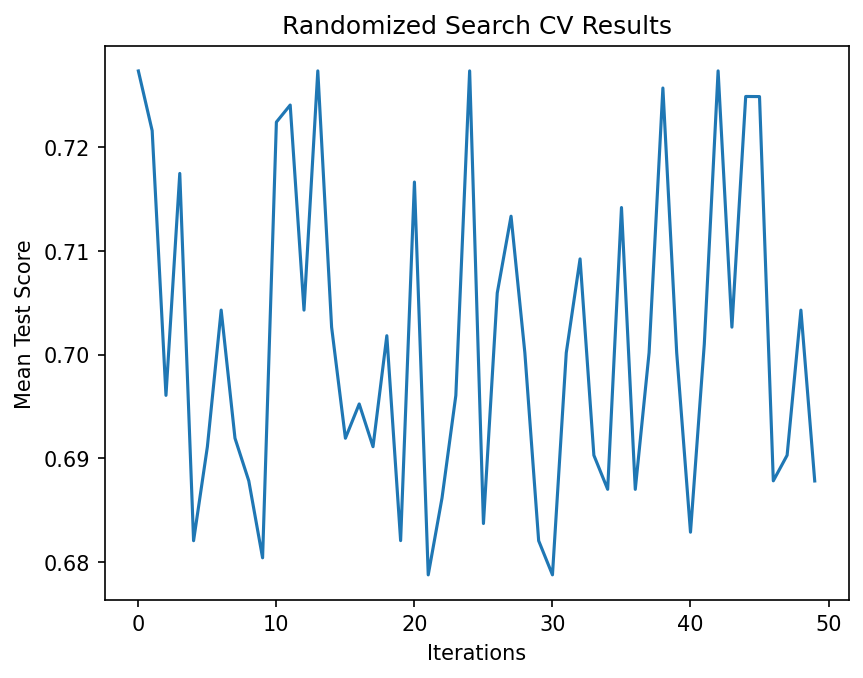

In [40]:
# Plot the results of the parameter search
plt.plot(rs.cv_results_['mean_test_score'])
plt.xlabel('Iterations')
plt.ylabel('Mean Test Score')
plt.title('Randomized Search CV Results')
plt.show()

### AUC, ROC, log loss

In [50]:
len(rfc.classes_)

7

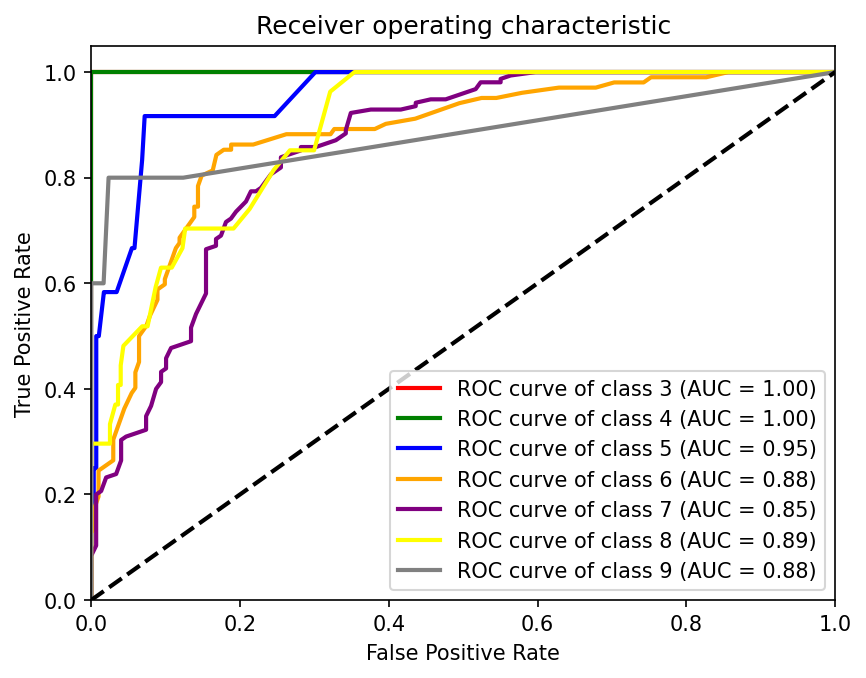

In [51]:
from sklearn.metrics import roc_curve, auc, log_loss

y_pred_proba = rfc.predict_proba(X_test)

# Compute the ROC curves and AUC scores for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(rfc.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == rfc.classes_[i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()
lw = 2
colors = ['red', 'green', 'blue', 'orange', 'purple','yellow','gray']
for i, color in zip(range(len(rfc.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(rfc.classes_[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



### Arima

In [52]:
from statsmodels.tsa.arima.model import ARIMA
arimamodel = imputed_df_interpolate.copy()
arimamodel.set_index('date',inplace=True)

In [56]:
arimamodel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1518 entries, 2014-02-19 to 2014-05-31
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1518 non-null   object 
 1   mood           1518 non-null   int64  
 2   arousal        1518 non-null   float64
 3   valence        1518 non-null   float64
 4   activity       1518 non-null   float64
 5   screen         1518 non-null   float64
 6   call           1518 non-null   float64
 7   sms            1518 non-null   float64
 8   builtin        1518 non-null   float64
 9   communication  1518 non-null   float64
 10  entertainment  1518 non-null   float64
 11  finance        1518 non-null   float64
 12  game           1518 non-null   float64
 13  office         1518 non-null   float64
 14  other          1518 non-null   float64
 15  social         1518 non-null   float64
 16  travel         1518 non-null   float64
 17  unknown        1518 non-null   flo

In [57]:
from sklearn.metrics import mean_squared_error

mood = arimamodel['mood']

arimamodel['id'] = arimamodel['id'].astype(int)

# Split the data into training and testing sets
train_size = int(len(mood) * 0.8)
train, test = mood[:train_size], mood[train_size:]

# Fit an ARIMA model with exogenous variables
exog_train = arimamodel.drop(['mood'], axis=1)[:train_size]
exog_test = arimamodel.drop(['mood'], axis=1)[train_size:]

model = ARIMA(train, order=(1,1,1), exog=exog_train)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, exog=exog_test, dynamic=False)

# Evaluate the model's performance
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)


/Users/harshpundhir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/harshpundhir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/harshpundhir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/harshpundhir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when 

RMSE: 1.0091255335581255


/Users/harshpundhir/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/harshpundhir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [58]:
print('RMSE:', rmse)

RMSE: 1.0091255335581255


### ARima tuning

/Users/harshpundhir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/harshpundhir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/harshpundhir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/harshpundhir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when 

Best Hyperparameters: {'d': 0, 'p': 3, 'q': 1}
Best Test Score: 0.682827227489227


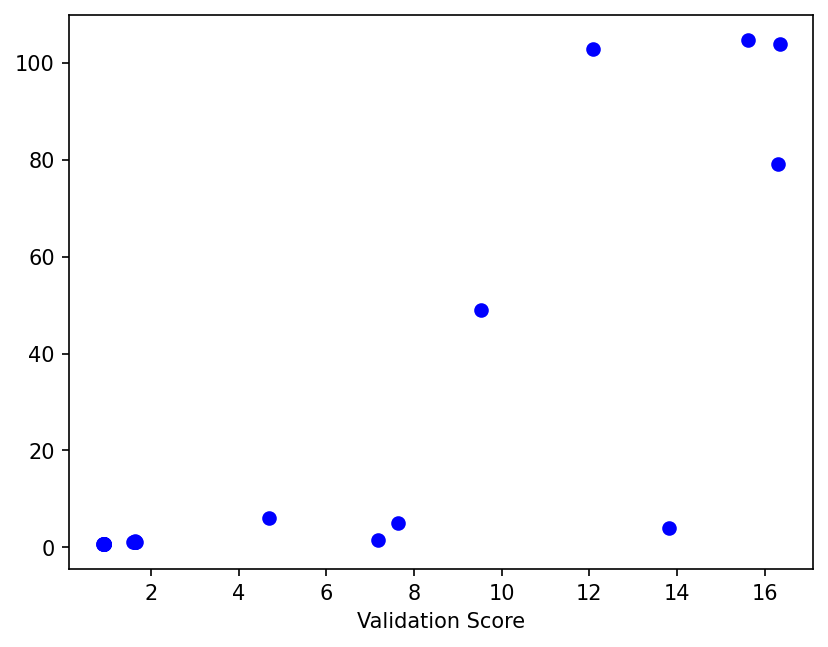

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid

# Load the dataset
df = arimamodel

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size]['mood'], df[train_size:]['mood']
exog_train = df.drop(['mood'], axis=1)[:train_size]
exog_test = df.drop(['mood'], axis=1)[train_size:]

# Define the hyperparameters to be tuned
param_grid = {'p': range(1, 4),
              'd': range(0, 3),
              'q': range(1, 4)}

# Define the number of splits for cross-validation
n_splits = 5

# Initialize an empty list to store the results
results = []

# Loop through all combinations of hyperparameters
for params in ParameterGrid(param_grid):
    
    # Initialize the cross-validation iterator
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    # Initialize a list to store the validation scores
    val_scores = []
    
    # Loop through each split in the cross-validation
    for train_index, val_index in tscv.split(train):
        
        # Split the data into training and validation sets
        train_cv, val_cv = train[train_index], train[val_index]
        exog_train_cv, exog_val_cv = exog_train.iloc[train_index], exog_train.iloc[val_index]
        
        # Train the model
        model = ARIMA(train_cv, order=(params['p'], params['d'], params['q']), exog=exog_train_cv)
        model_fit = model.fit()
        
        # Make predictions on the validation set
        y_pred = model_fit.forecast(steps=len(val_cv), exog=exog_val_cv)
        
        # Calculate the mean squared error on the validation set
        val_score = mean_squared_error(val_cv, y_pred, squared=False)
        val_scores.append(val_score)
    
    # Calculate the average validation score across all splits
    avg_val_score = np.mean(val_scores)
    
    # Train the final model on the entire training set
    model_final = ARIMA(train, order=(params['p'], params['d'], params['q']), exog=exog_train)
    model_final_fit = model_final.fit()
    
    # Make predictions on the testing set
    y_pred_test = model_final_fit.forecast(steps=len(test), exog=exog_test)
    
    # Calculate the mean squared error on the testing set
    test_score = mean_squared_error(test, y_pred_test, squared=False)
    
    # Store the results in the list
    results.append({'params': params, 'val_score': avg_val_score, 'test_score': test_score})

# Print the best hyperparameters and the corresponding score
if results:
    best_result = min(results, key=lambda x: x['test_score'])
    print('Best Hyperparameters:', best_result['params'])
    print('Best Test Score:', best_result['test_score'])
else:
    print("No results found.")
    
# Plot the validation and testing scores for each combination of hyperparameters
for r in results:
    params = r['params']
    val_score = r['val_score']
    test_score = r['test_score']
    
    plt.scatter(val_score, test_score, color='blue')
    plt.xlabel('Validation Score')
